In [2]:
import geopandas as gpd
import sys
sys.path.insert(1, 'D:\osm-transitgraph')
from AccessibilityEvaluators import AccessibilityEvaluator, GeneralAccessibilityEvaluator
time=780
epsg=32646

gpkg=r'D:\osm-transitgraph\perm\perm_tests.gpkg'
zones=gpd.read_file(gpkg, layer='perm_zones')
#zones=zones.loc[zones['core']==True]

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\gamma\AppData\Local\Temp\ipykernel_12428\2749252374.py:3: SyntaxWarning: invalid escape sequence '\o'
  sys.path.insert(1, 'D:\osm-transitgraph')


480


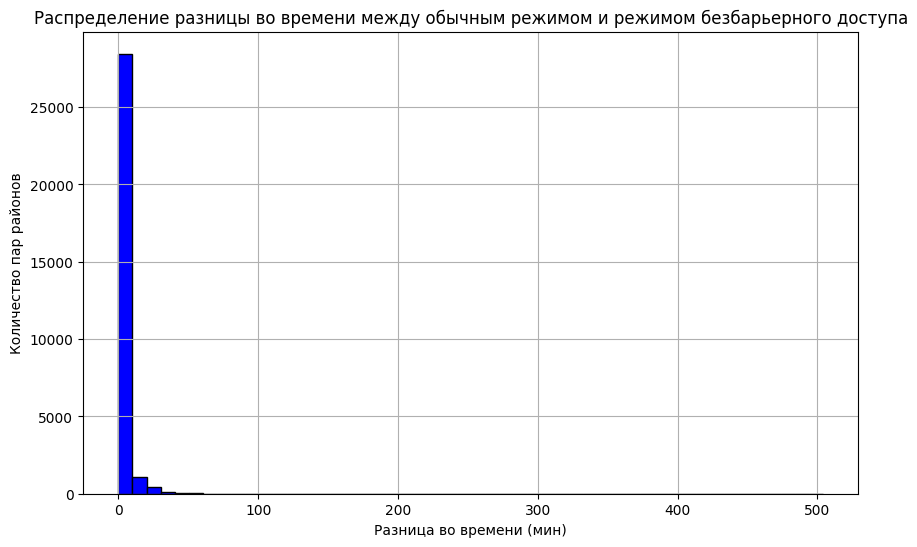

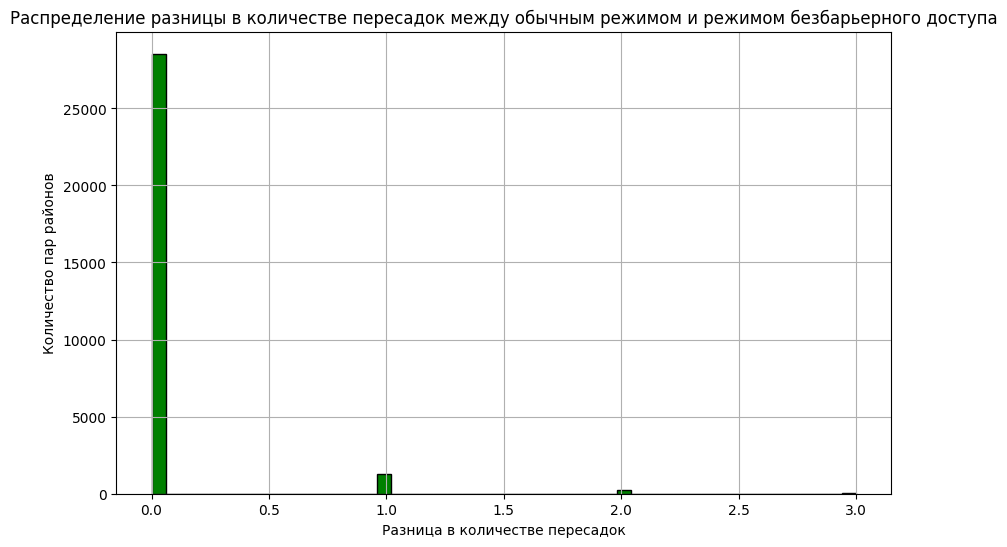

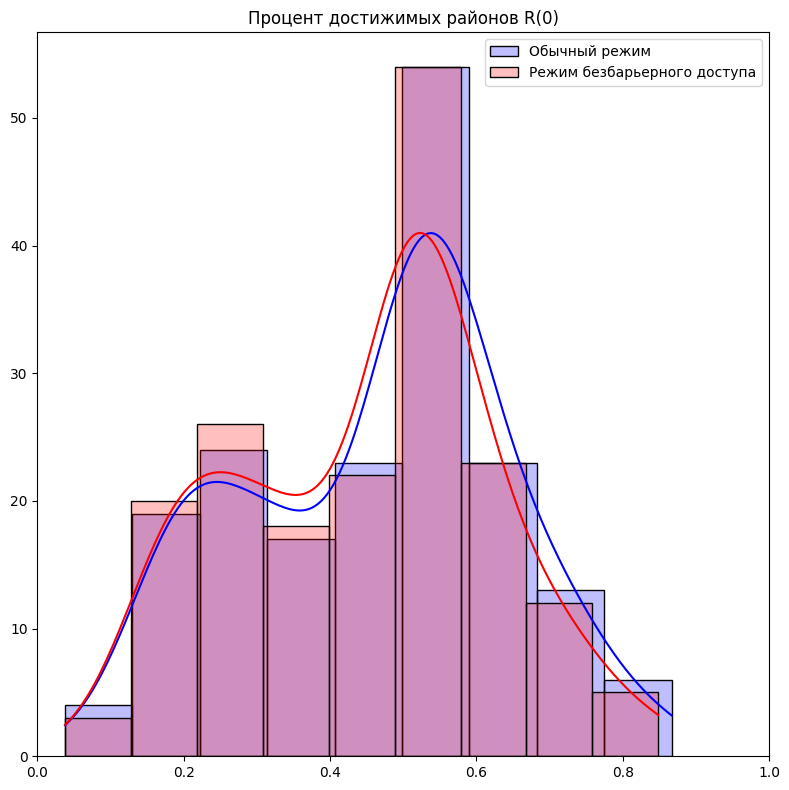

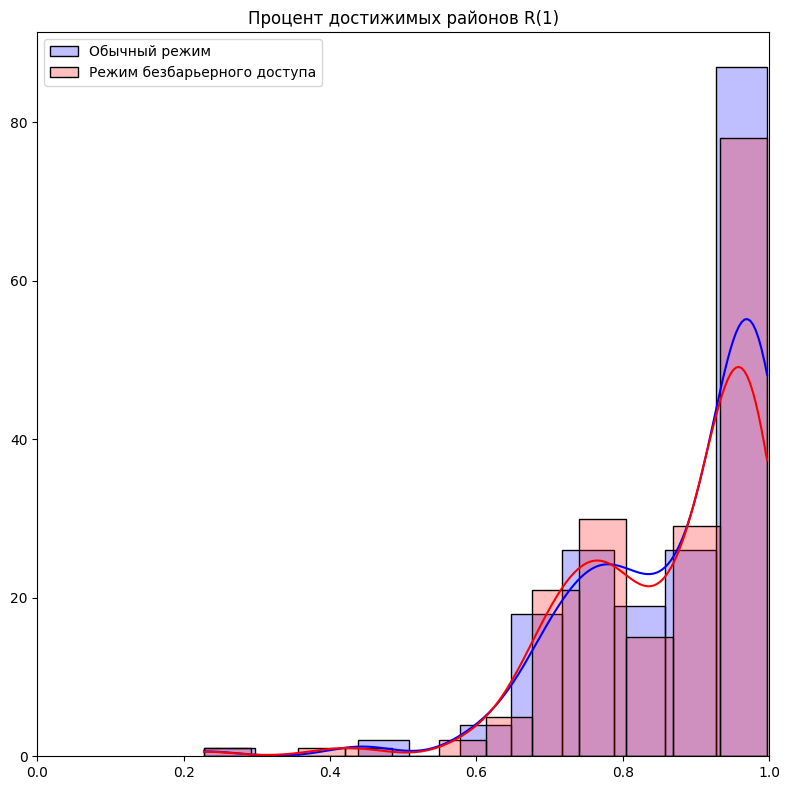

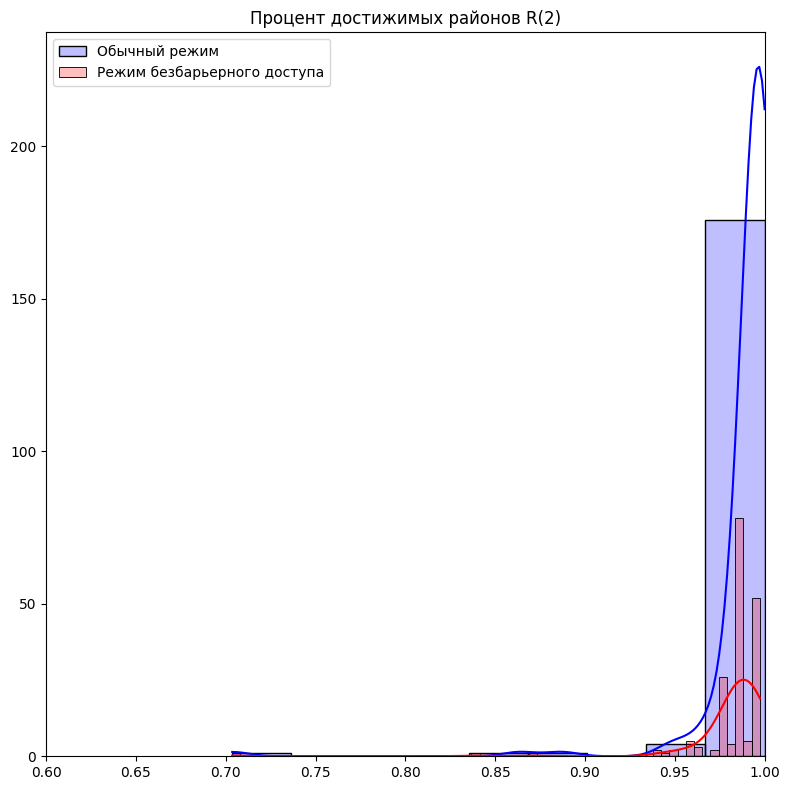

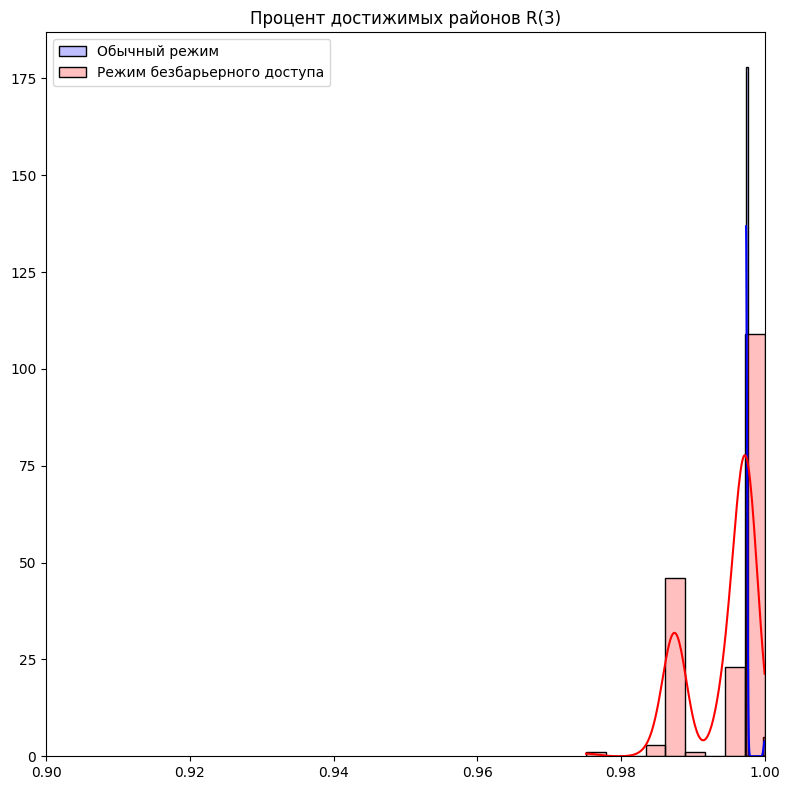

540


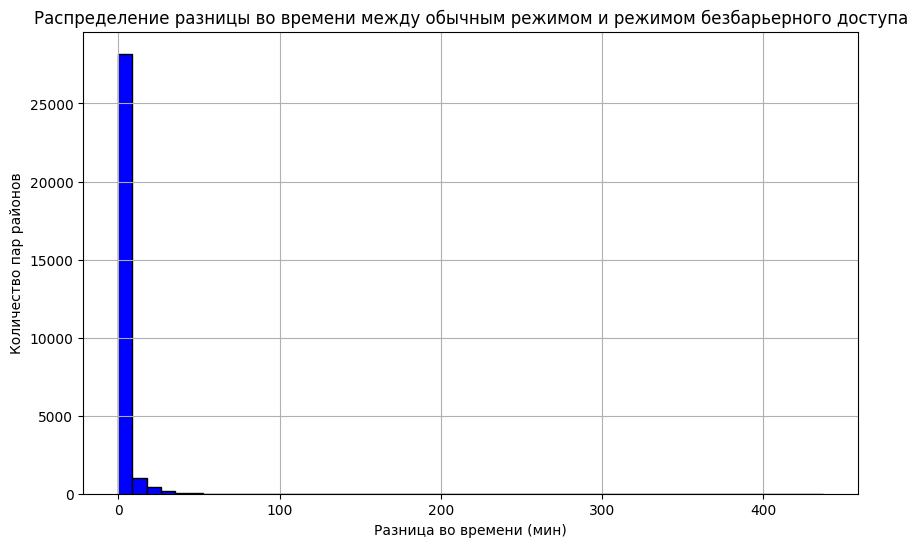

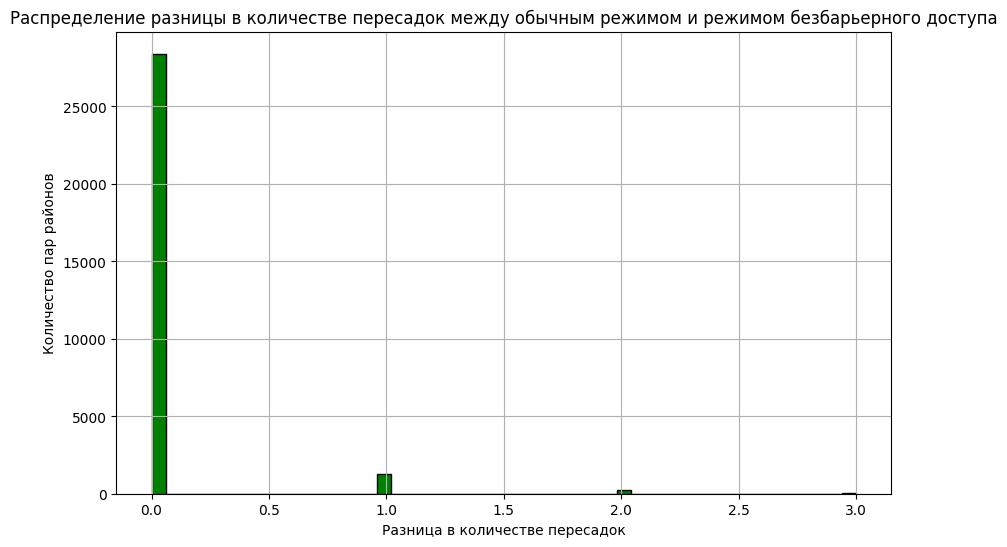

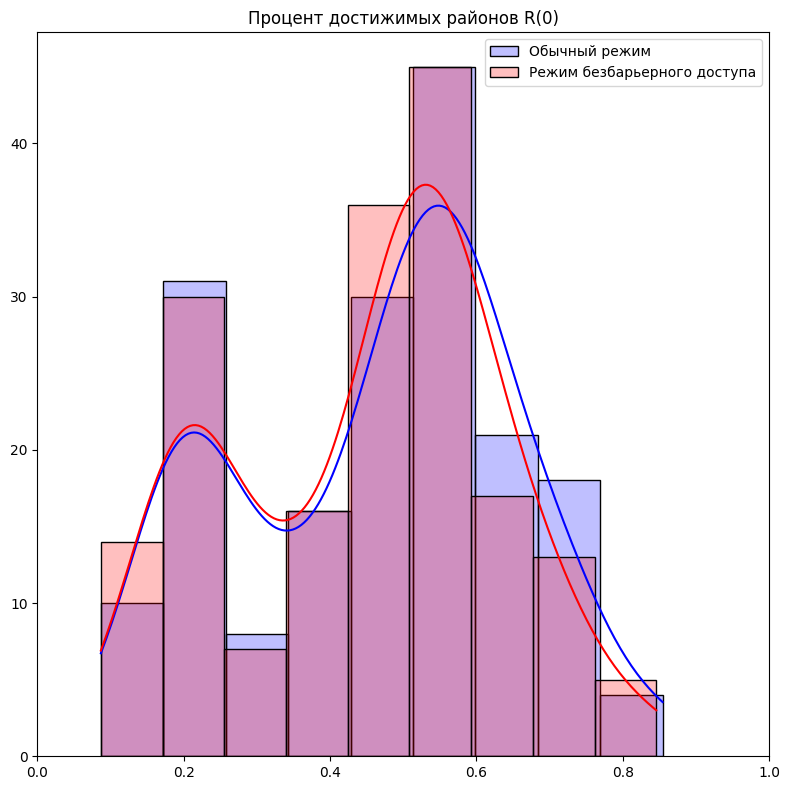

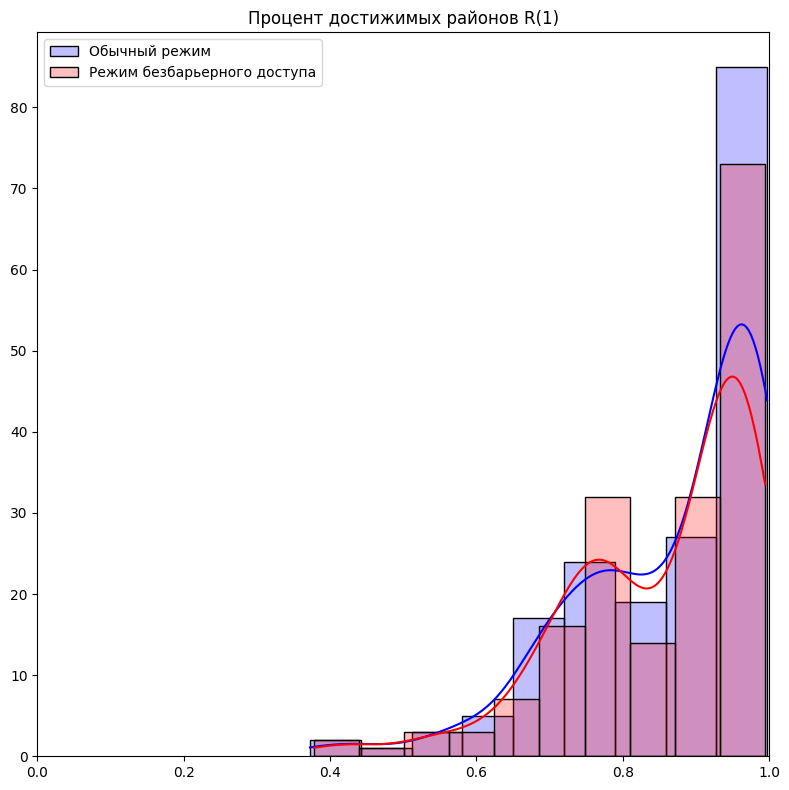

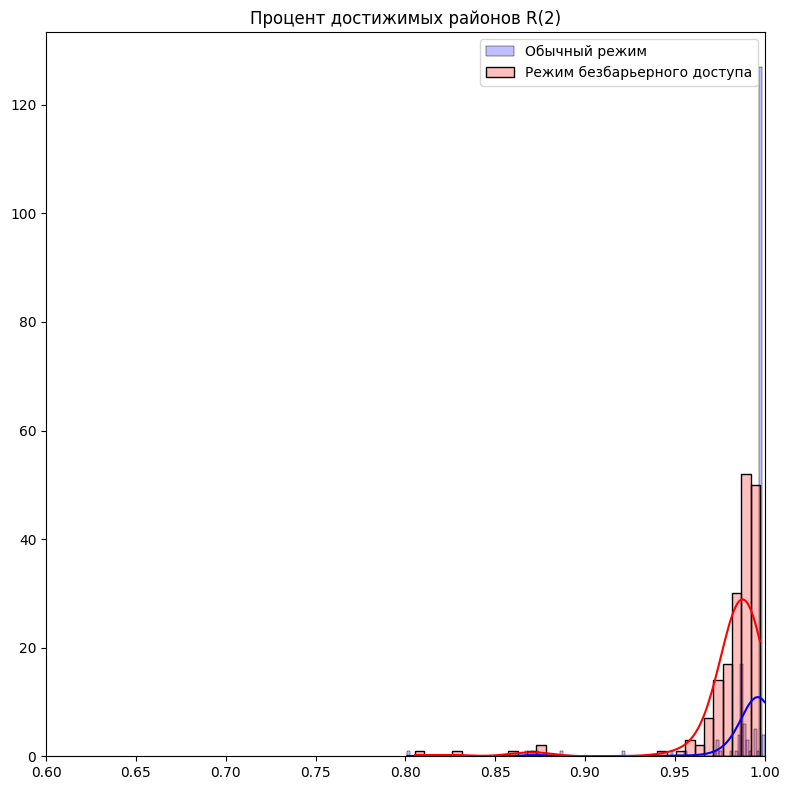

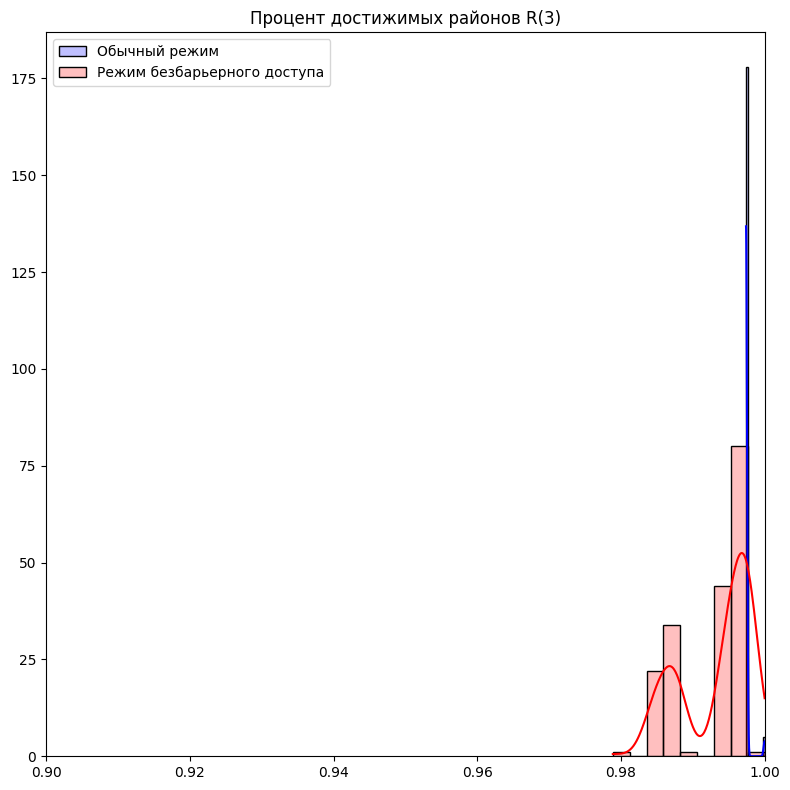

600


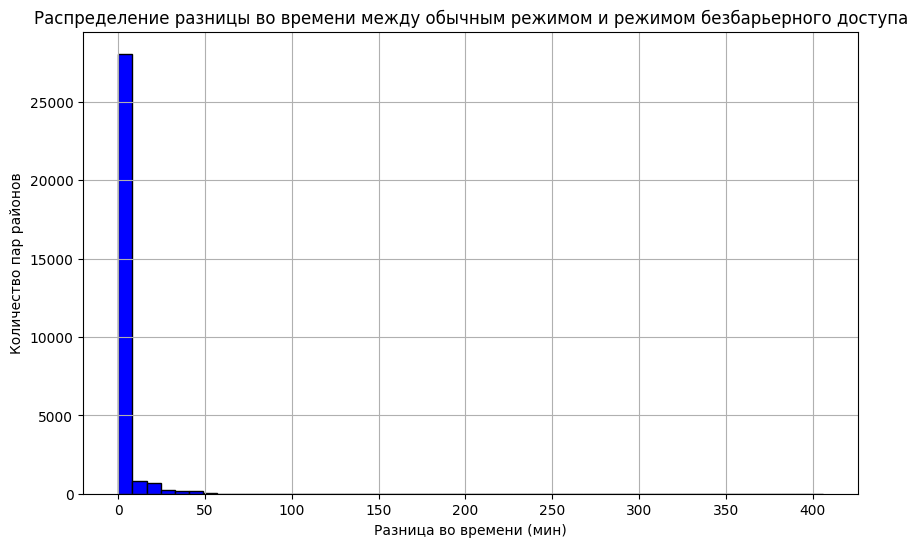

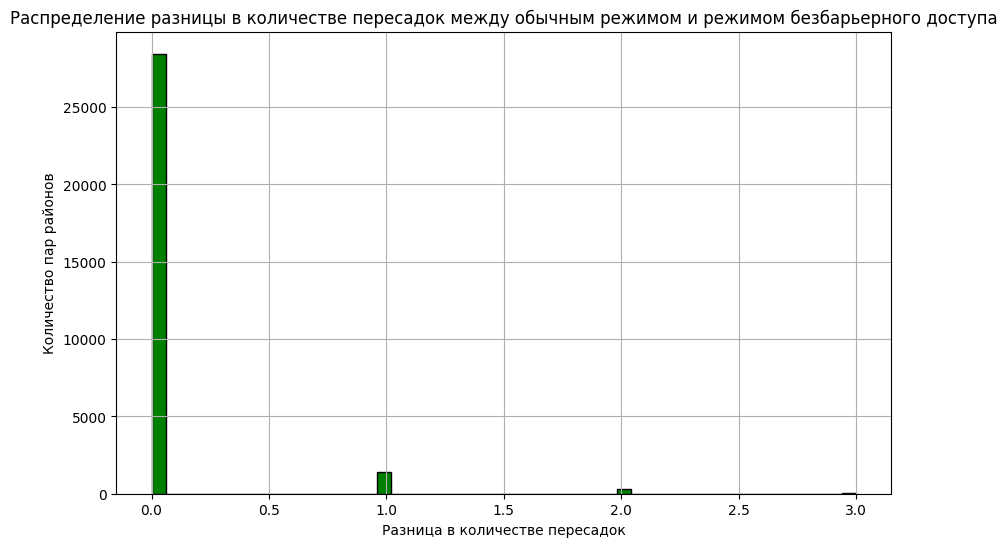

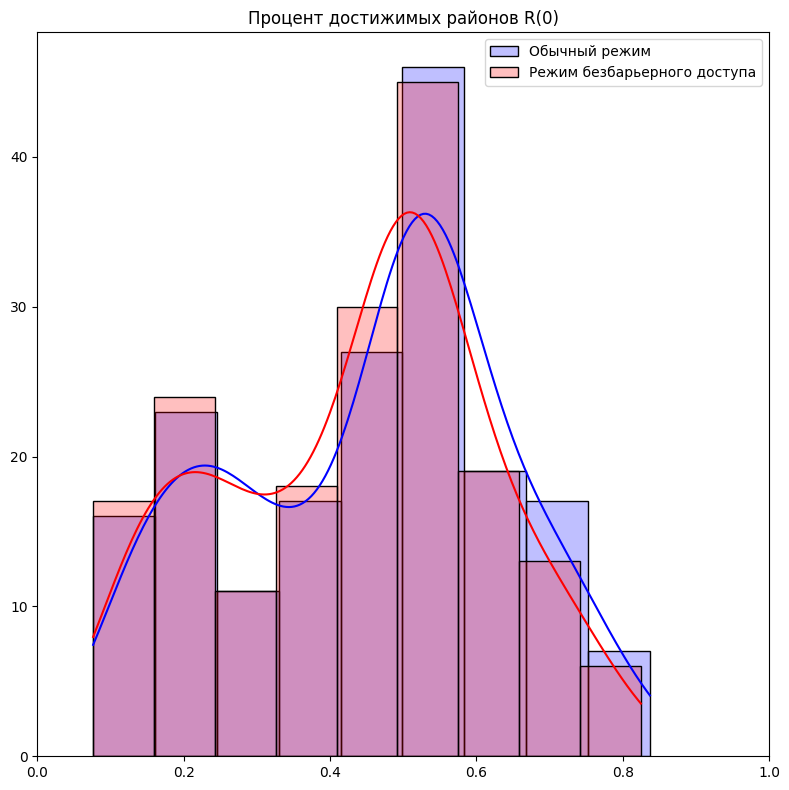

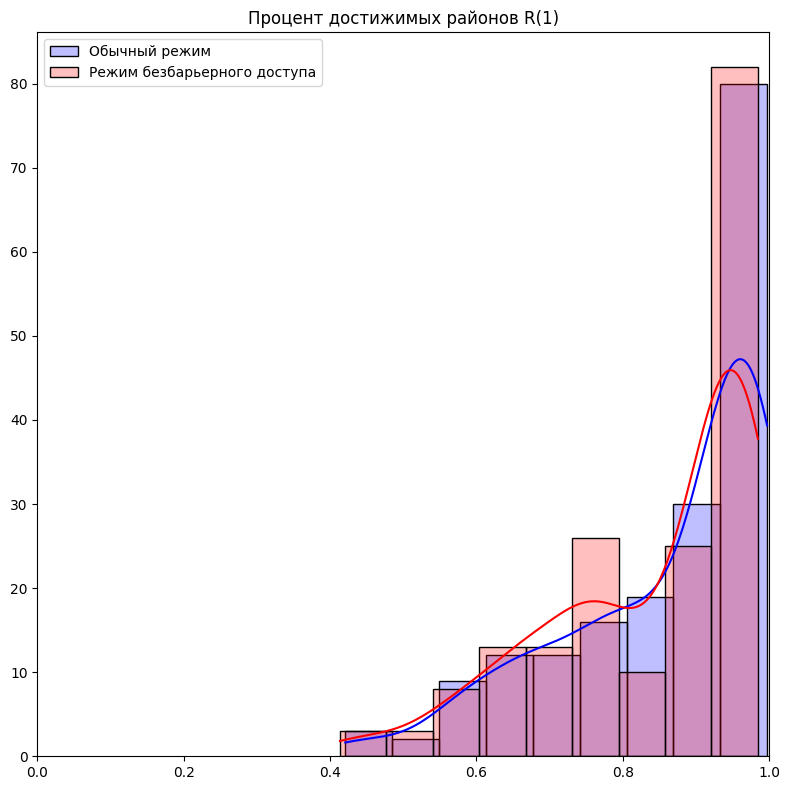

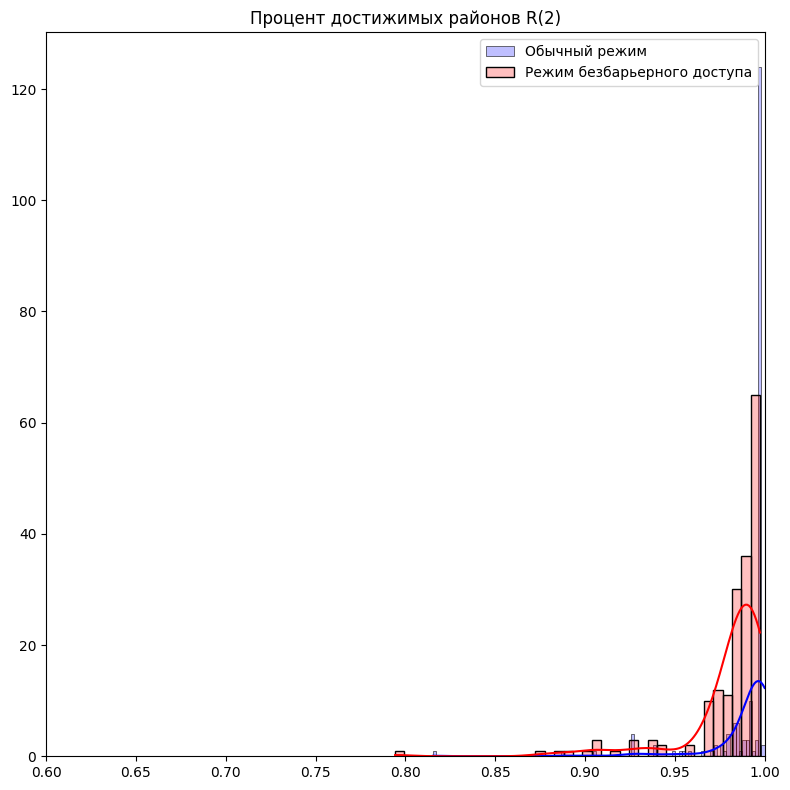

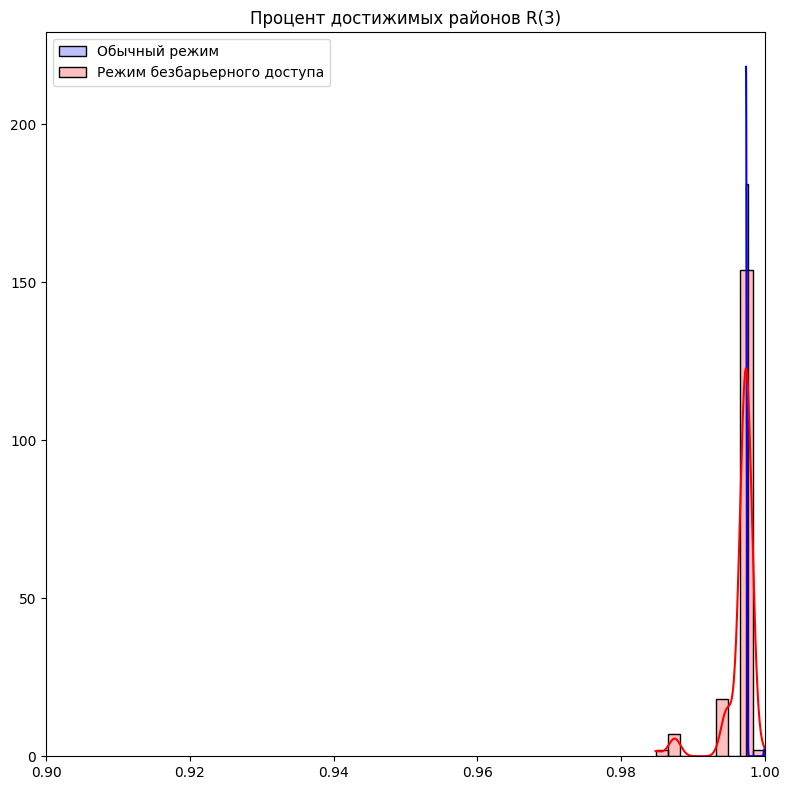

660


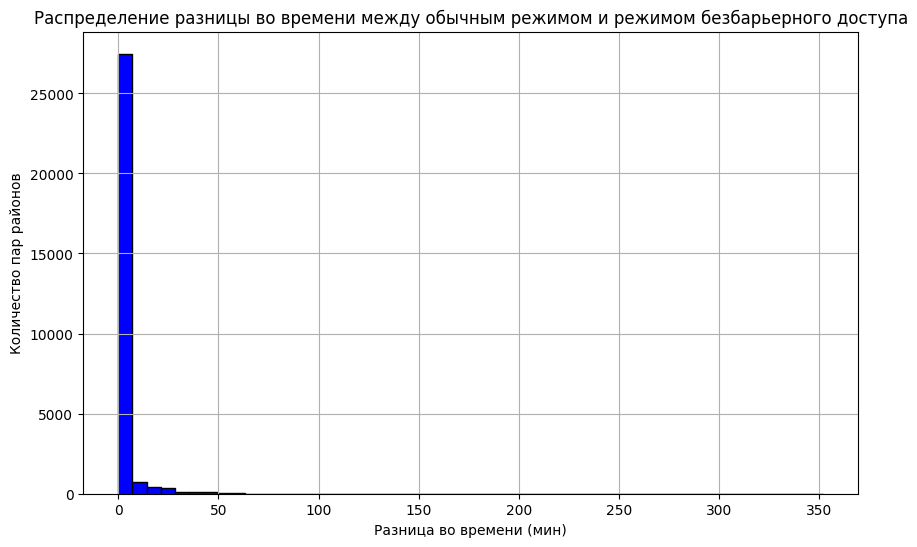

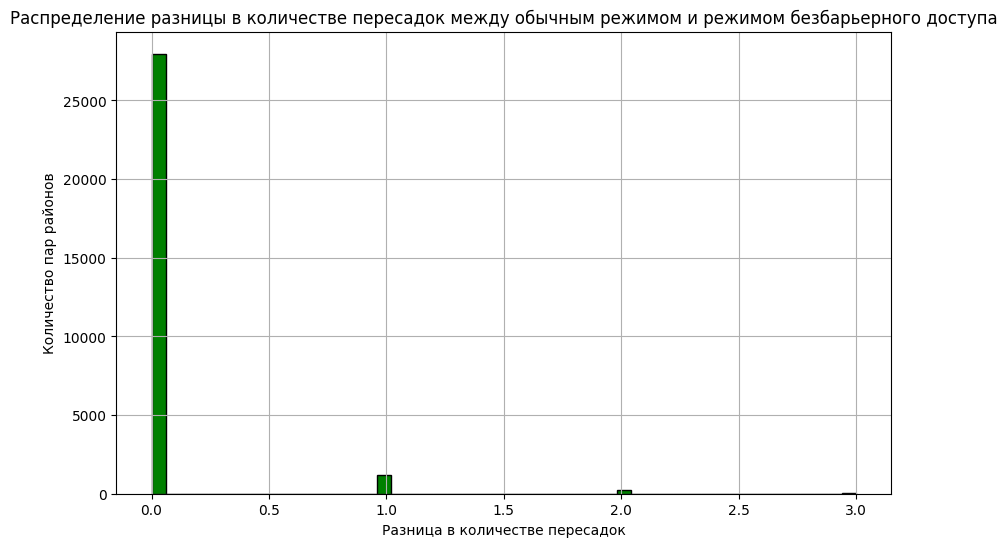

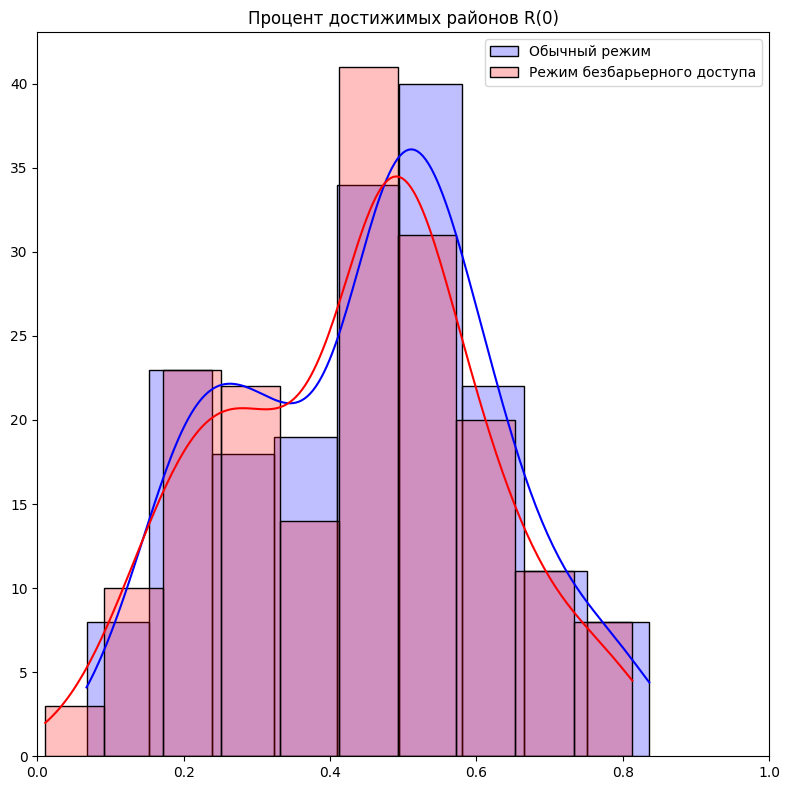

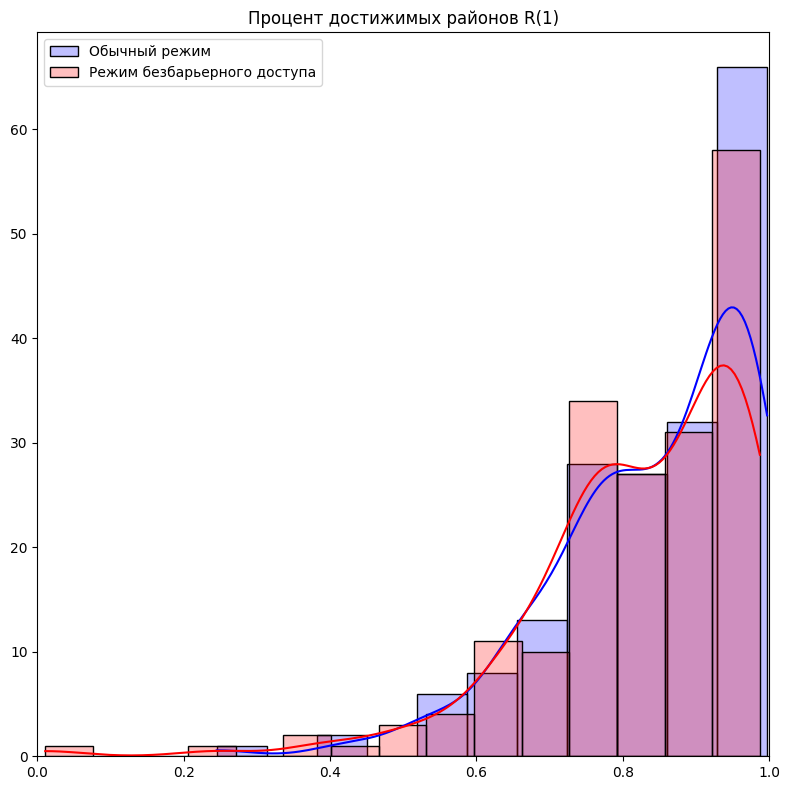

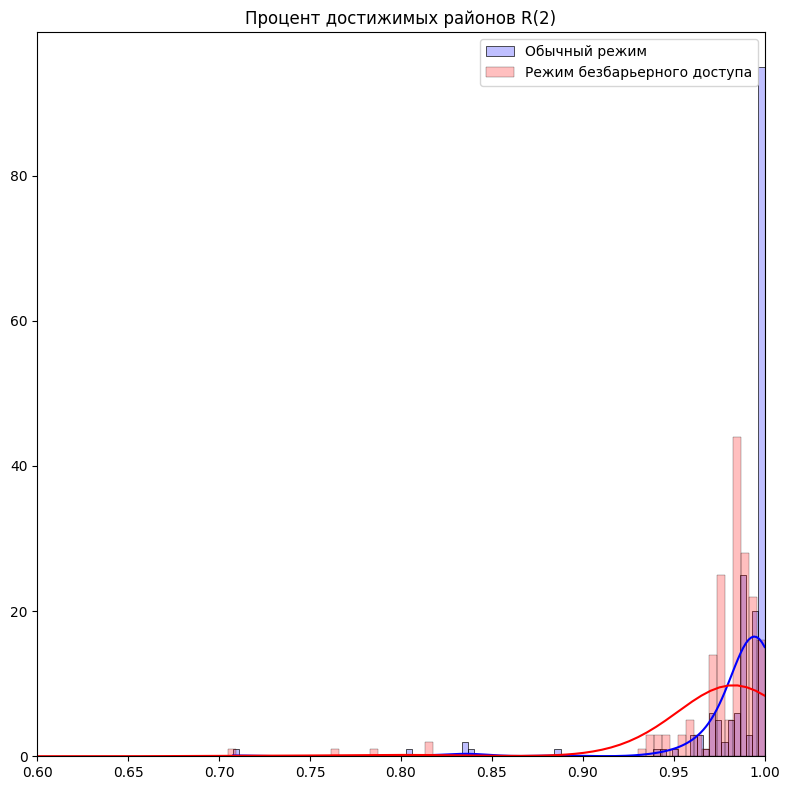

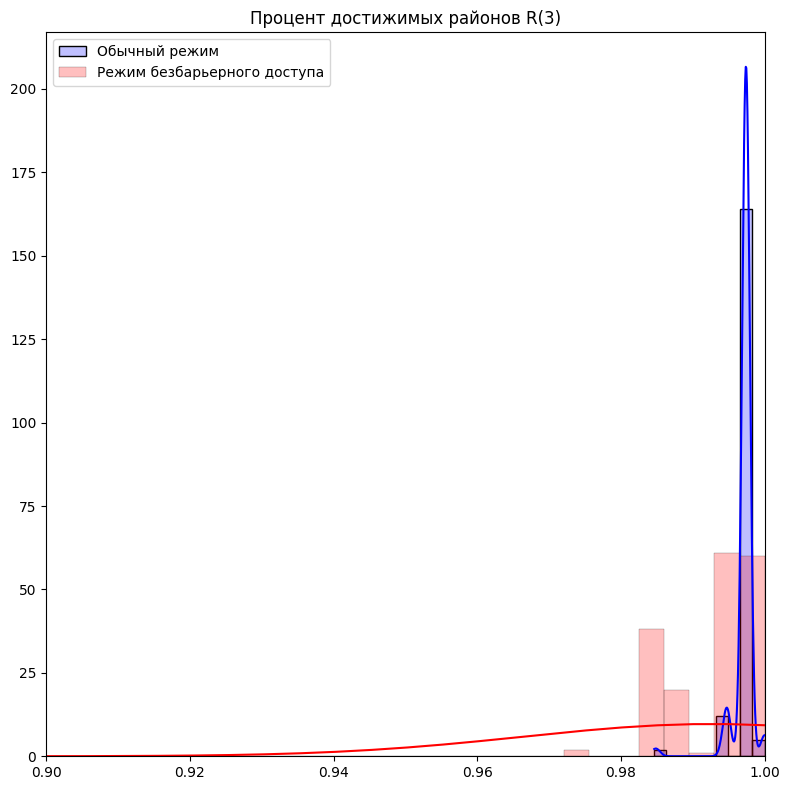

720


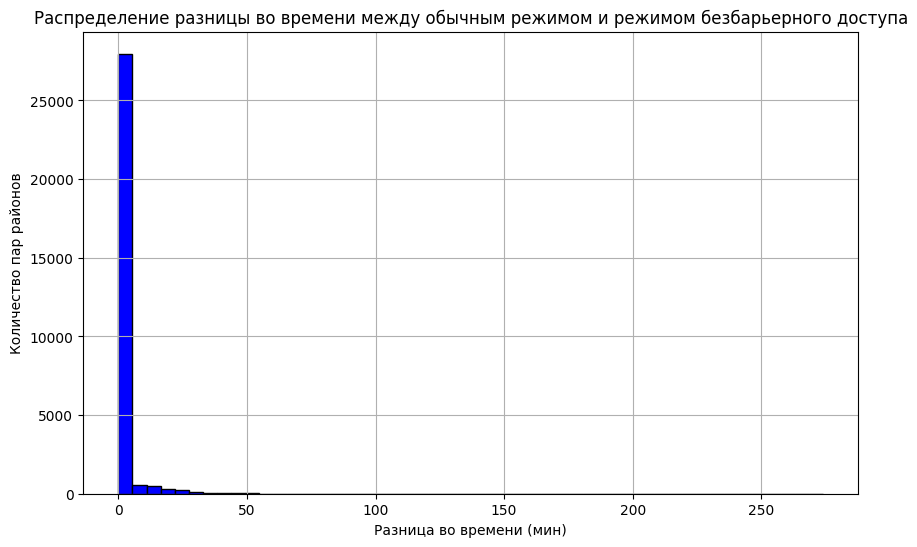

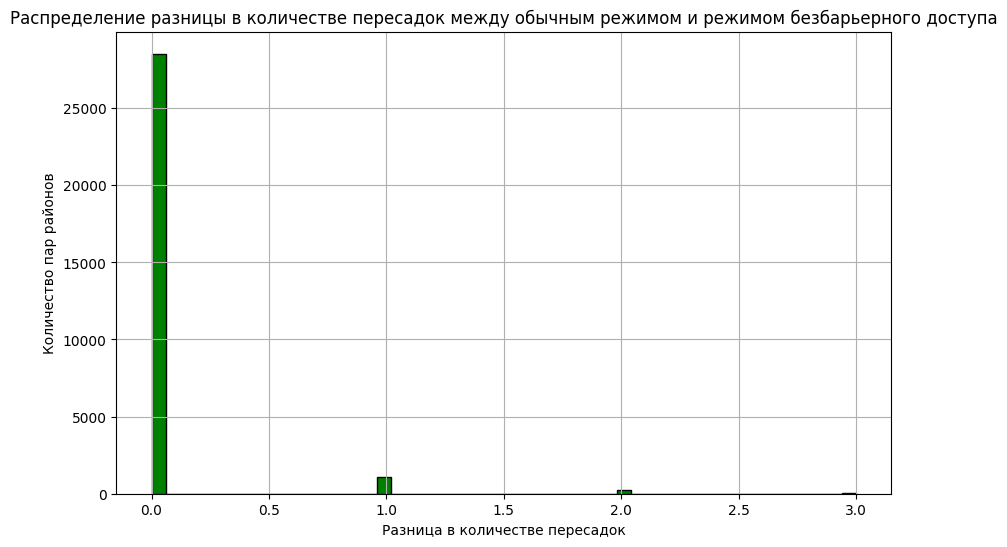

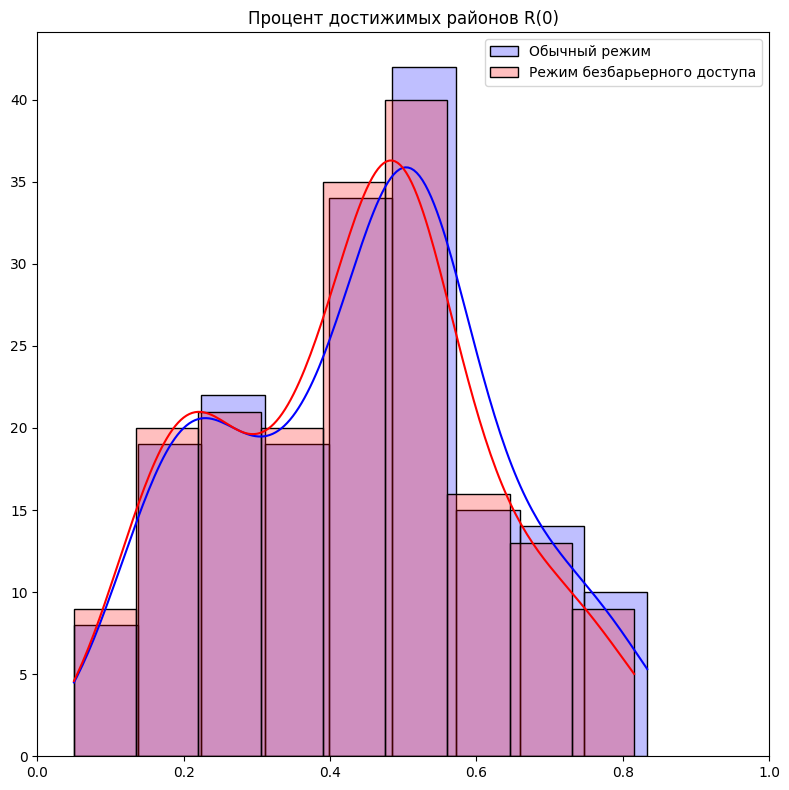

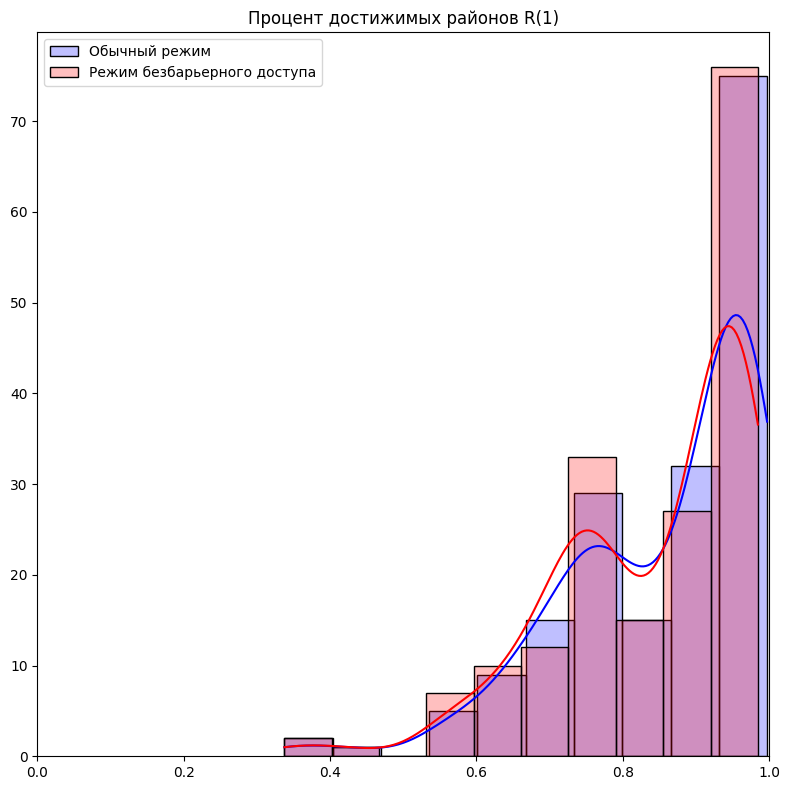

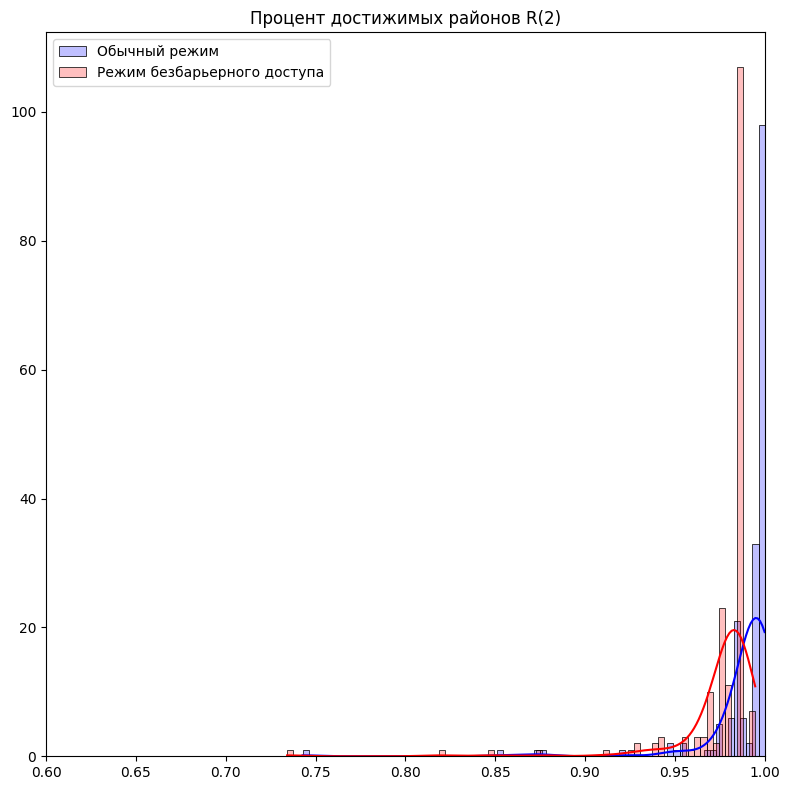

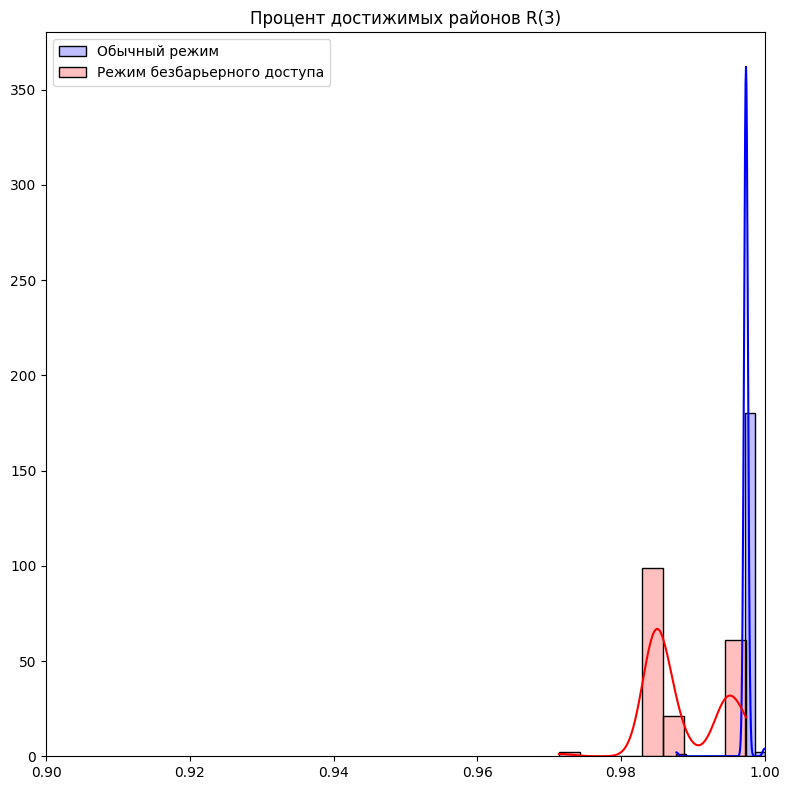

780


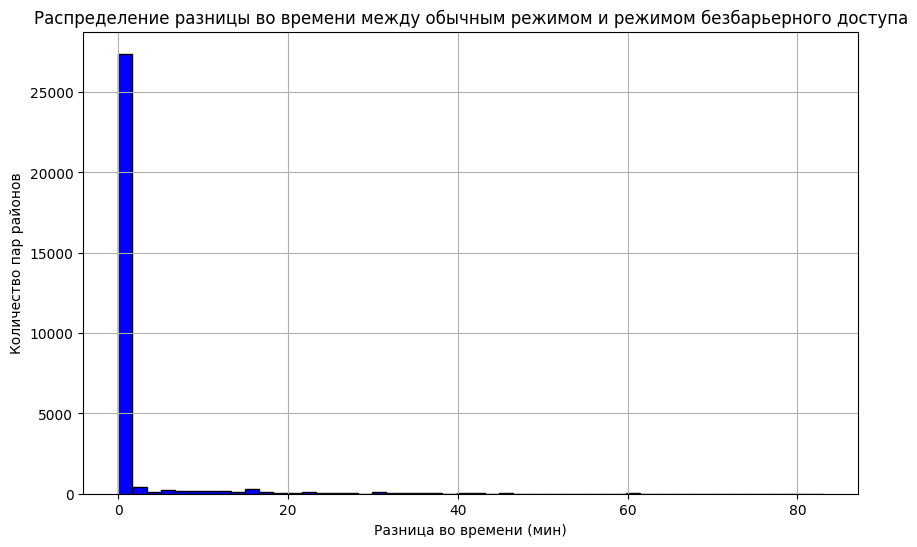

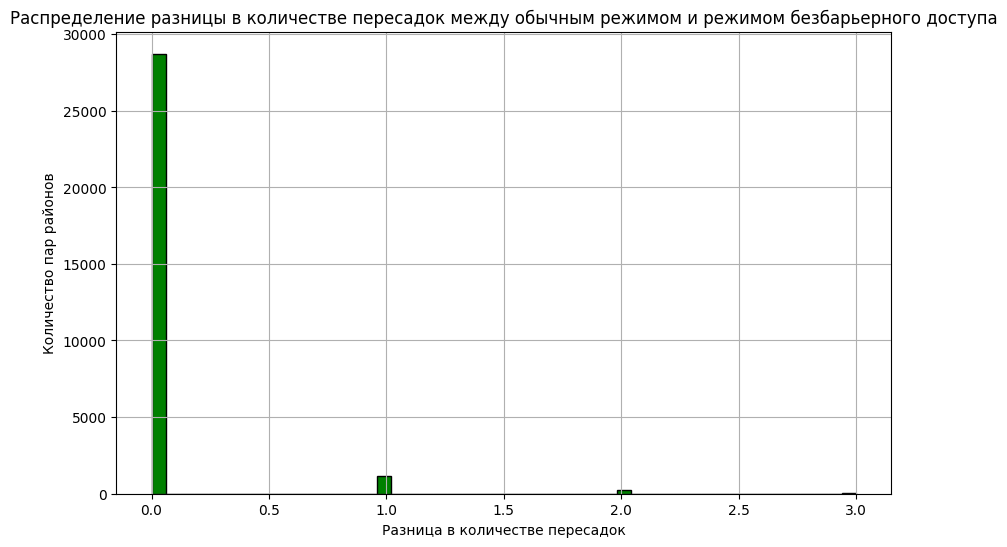

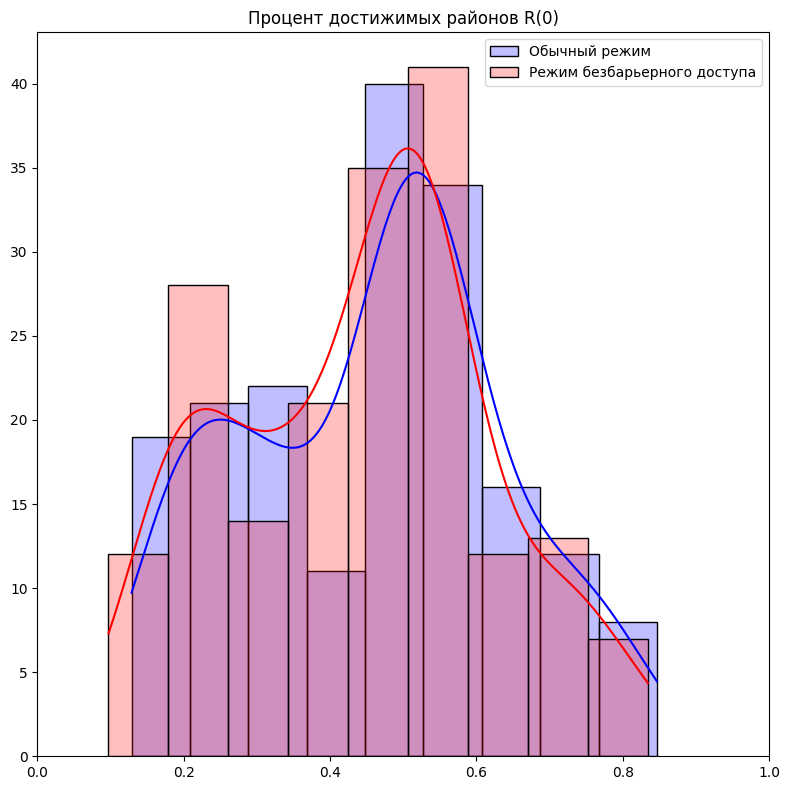

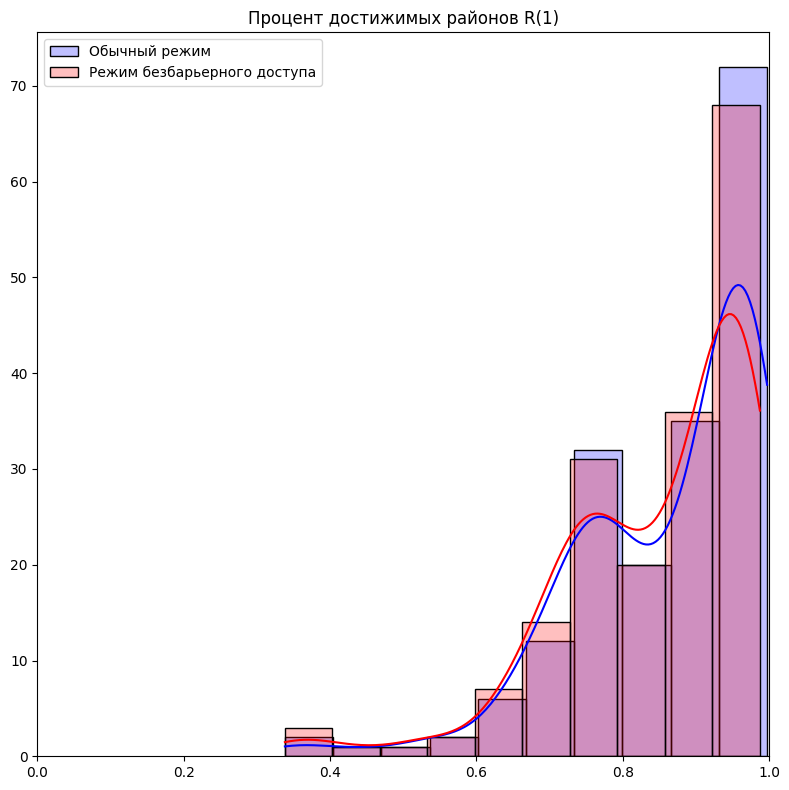

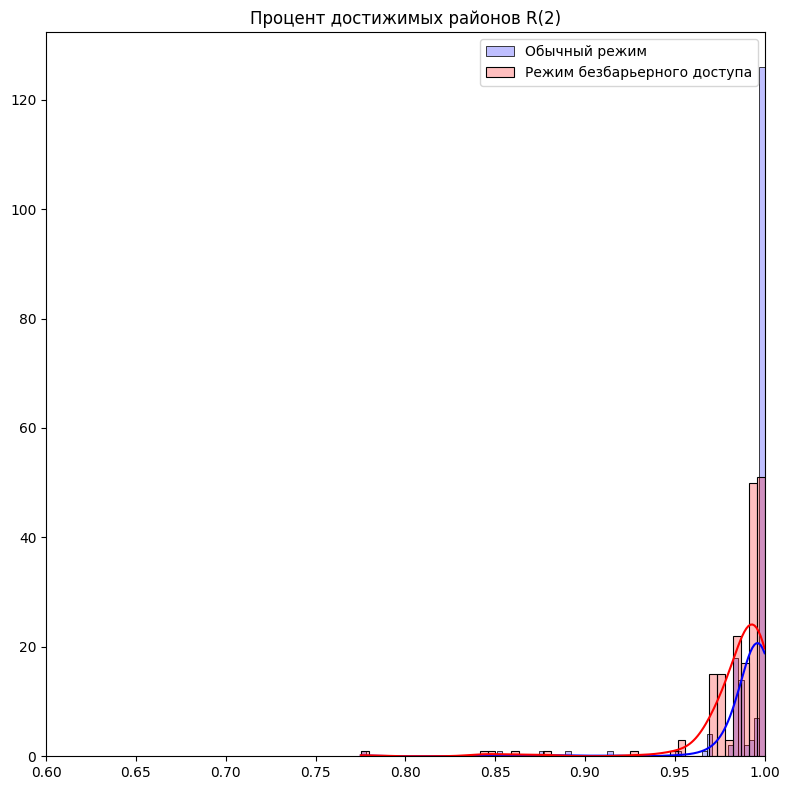

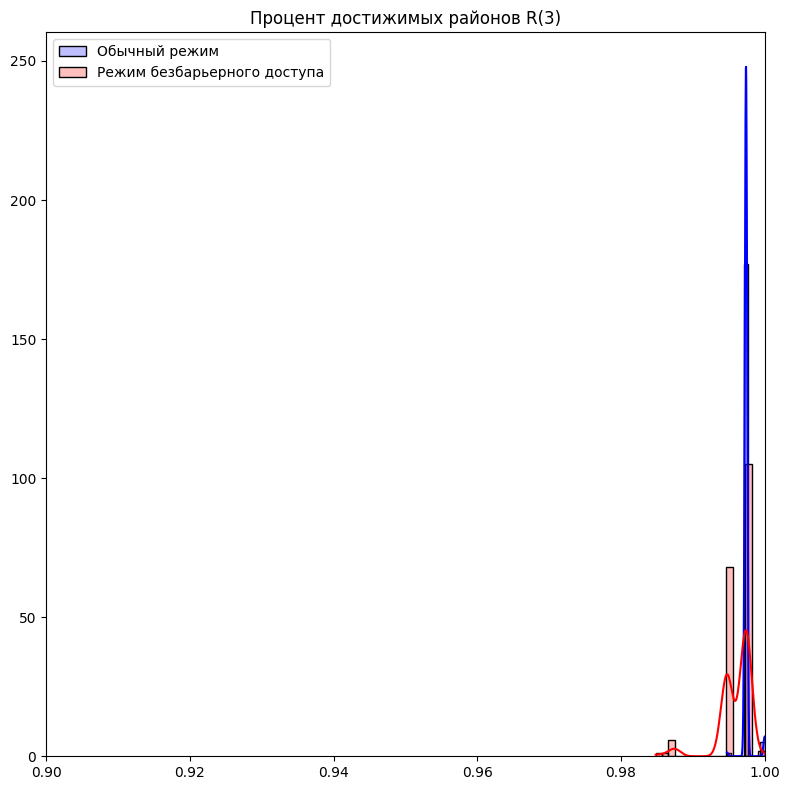

840


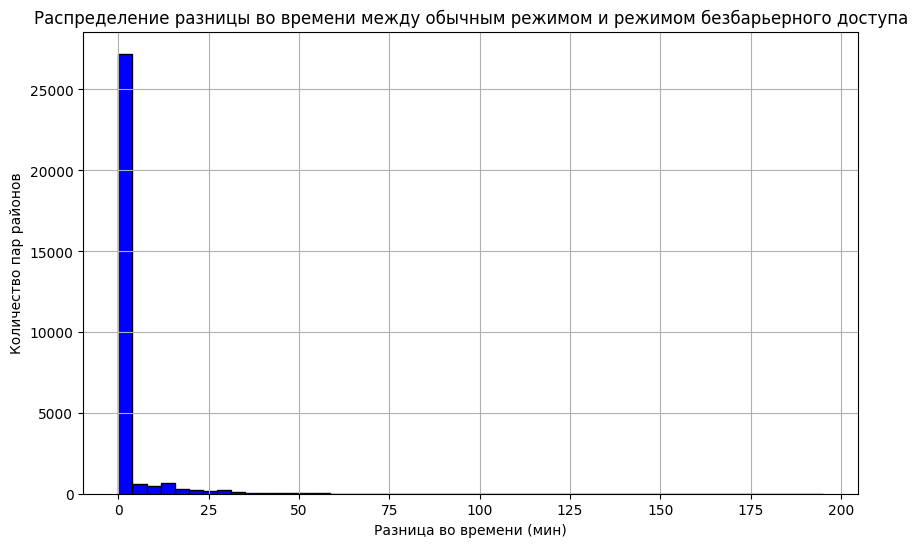

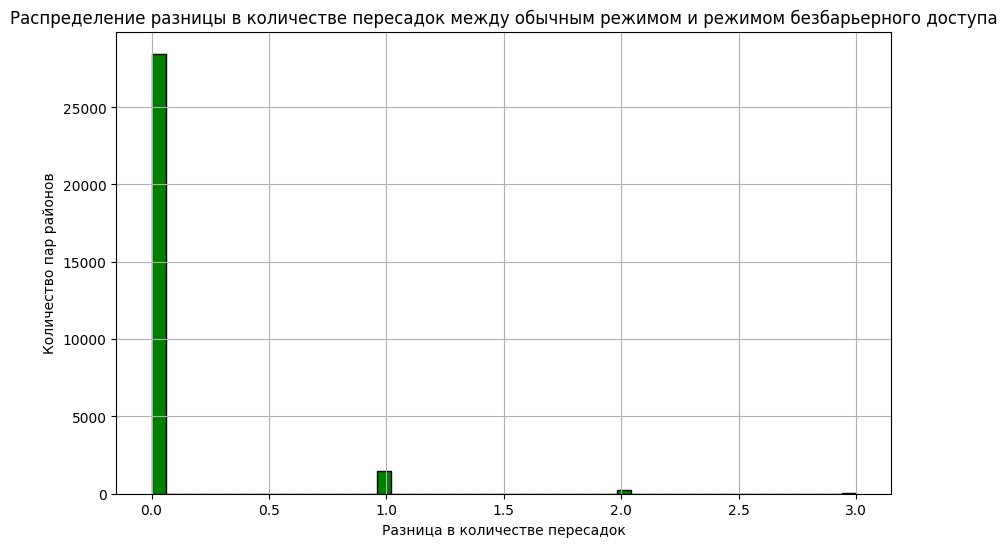

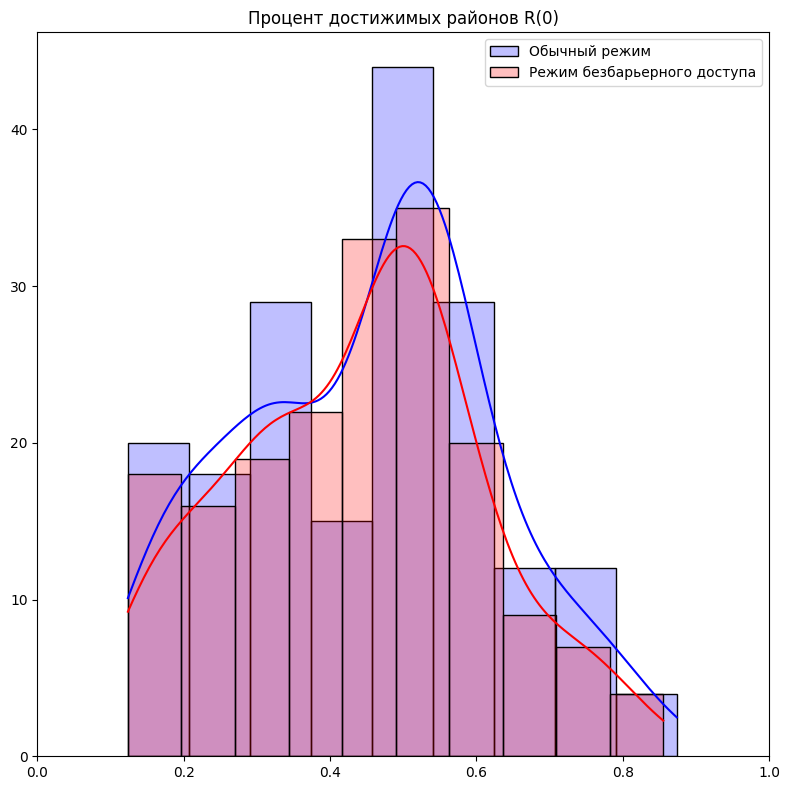

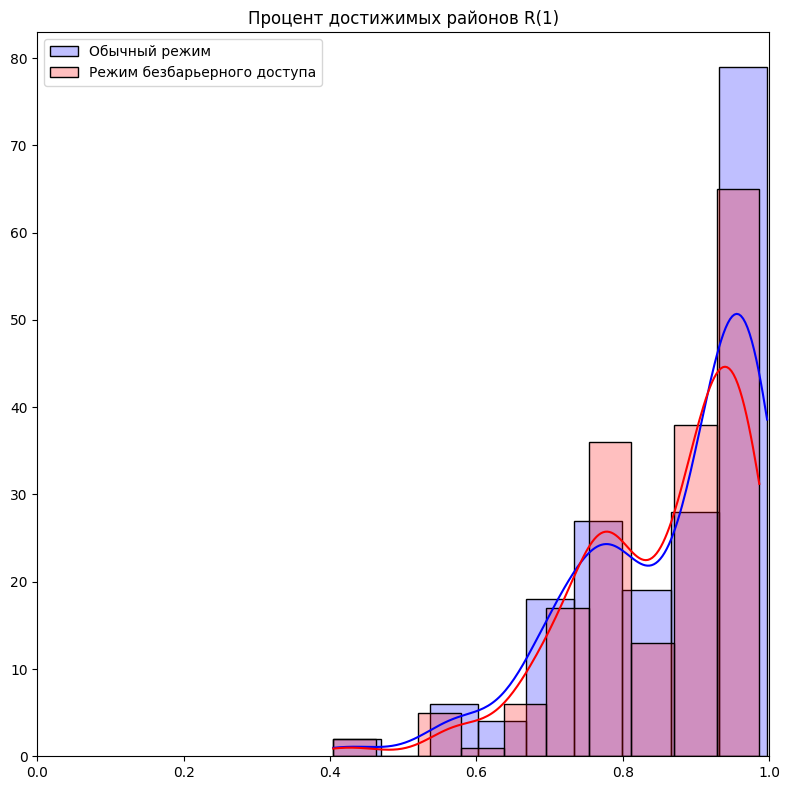

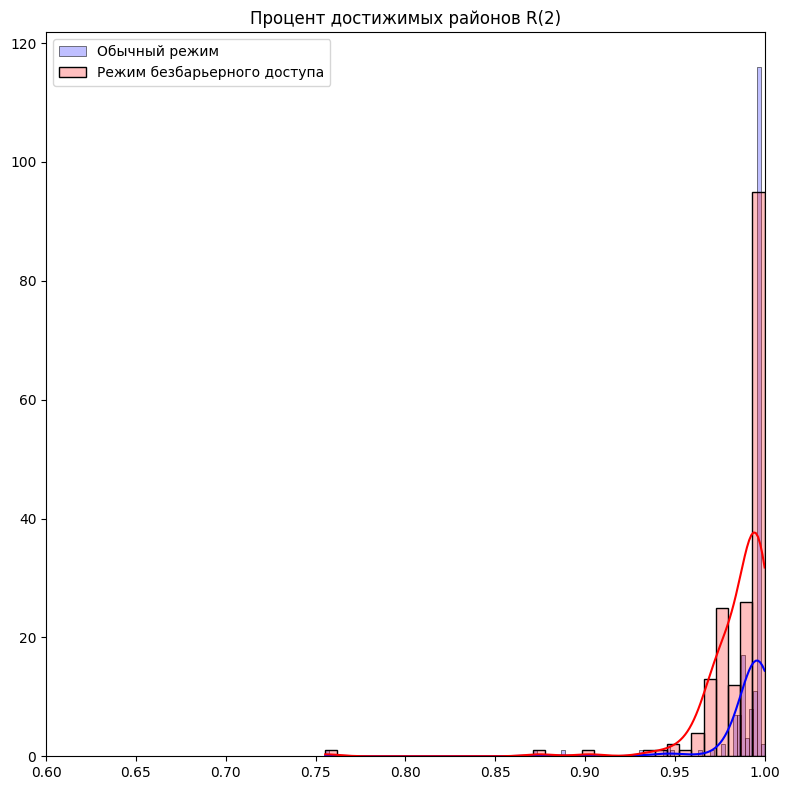

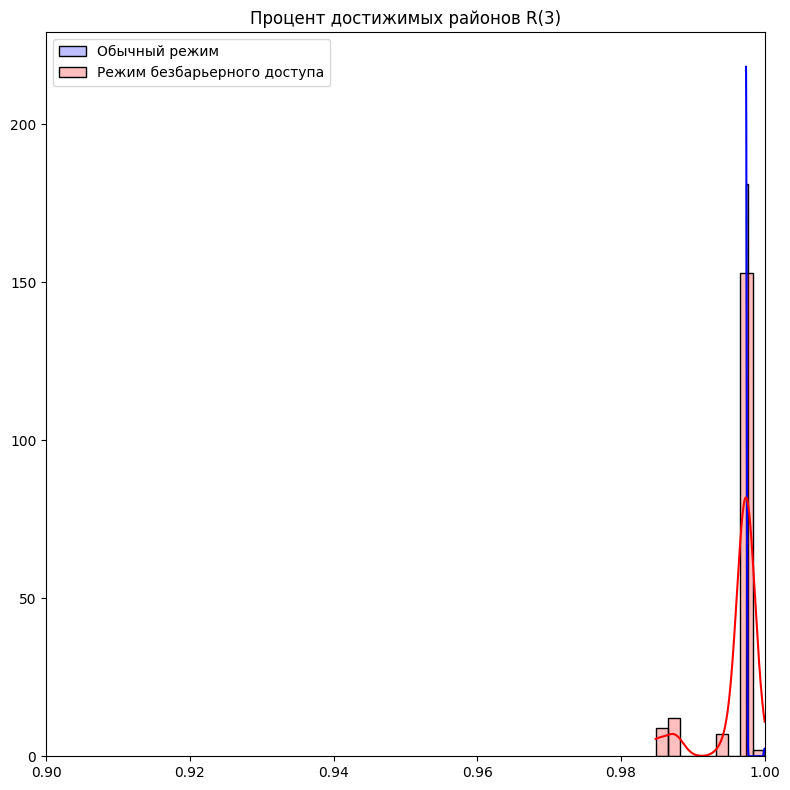

900


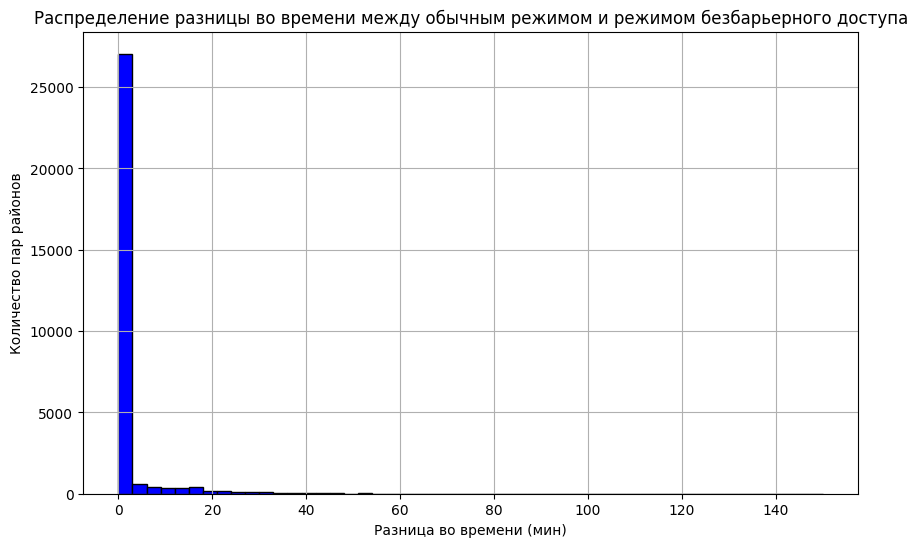

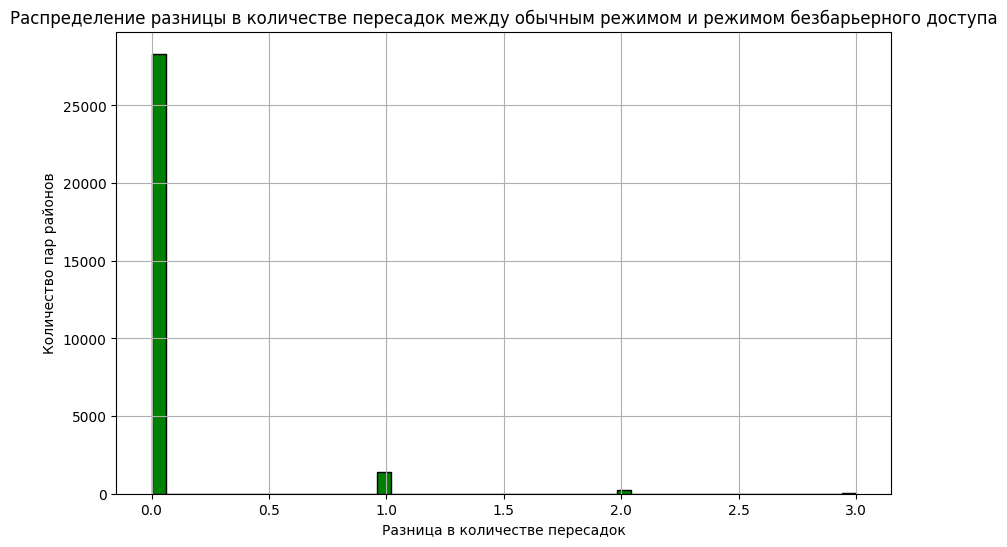

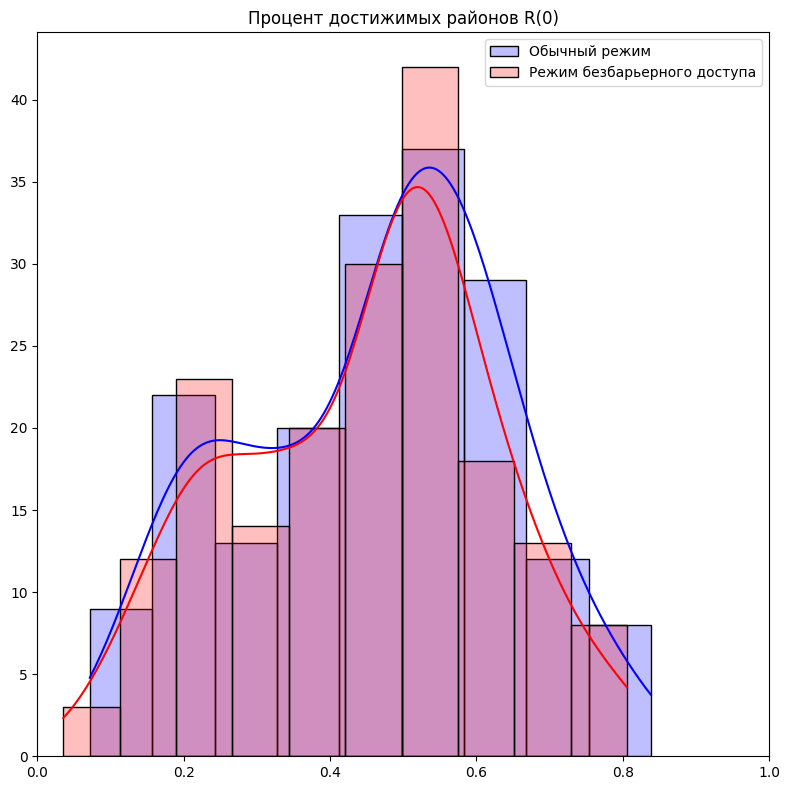

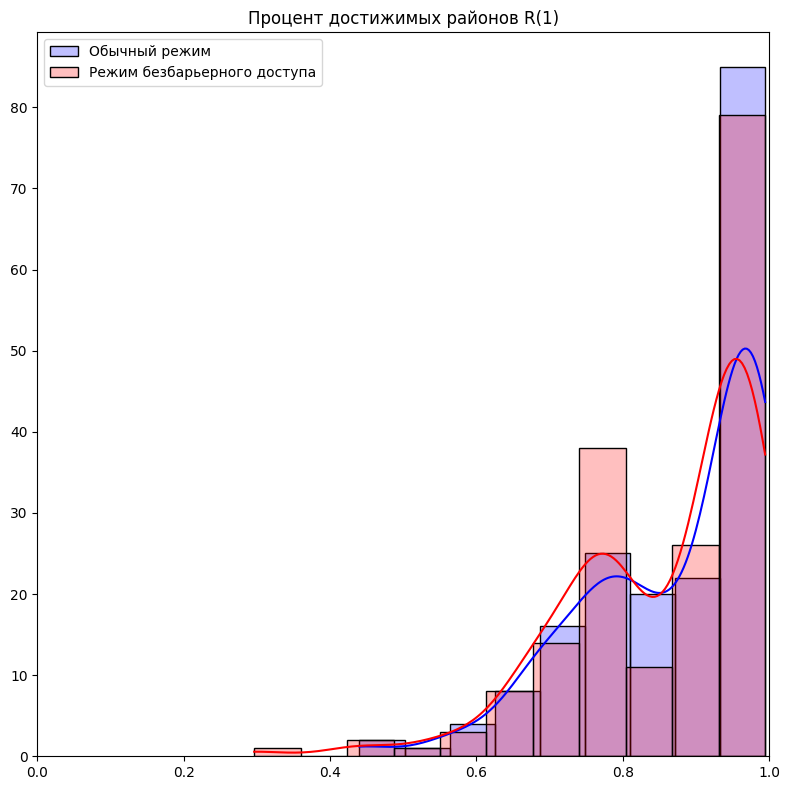

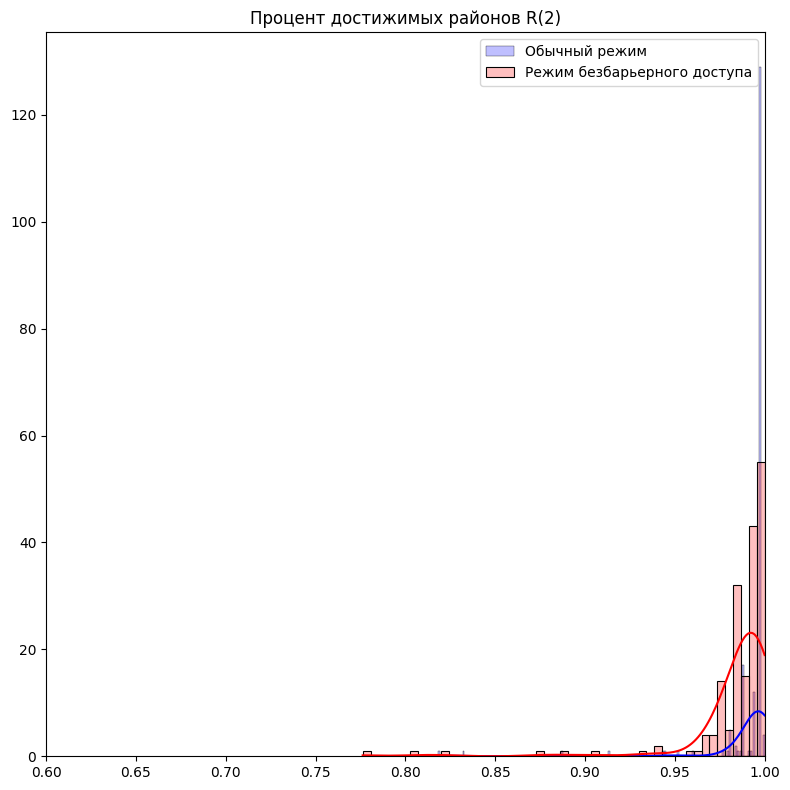

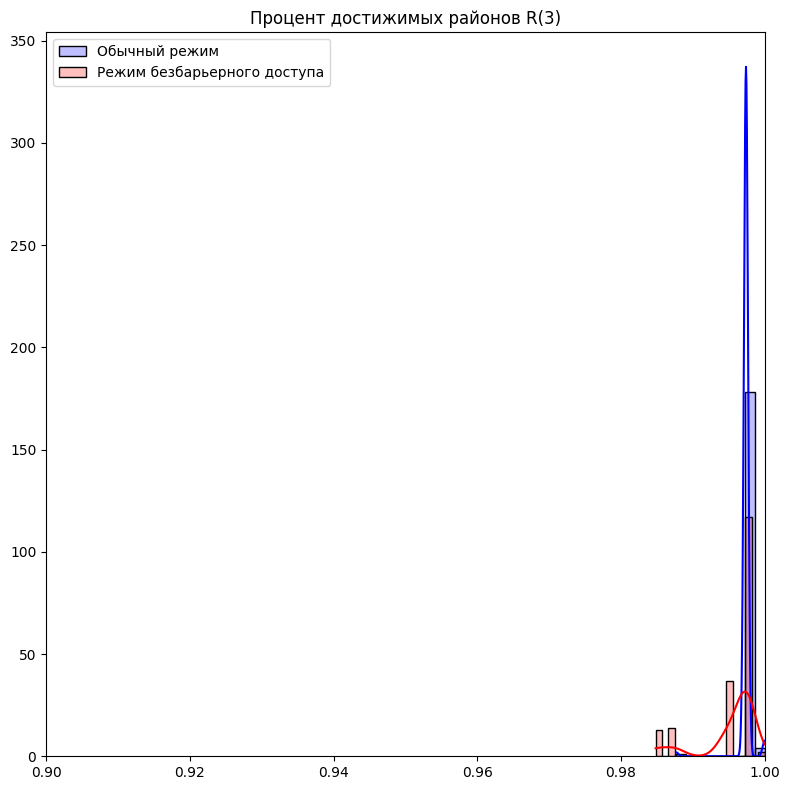

960


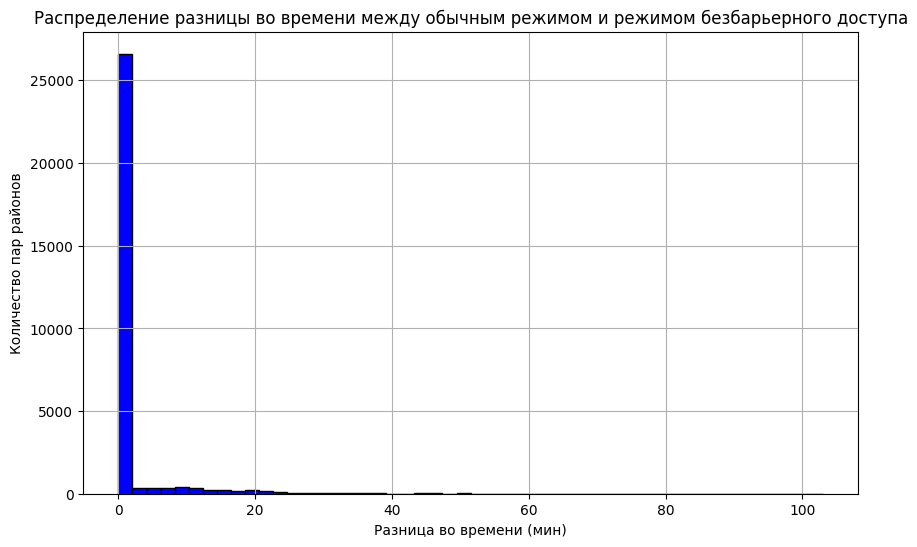

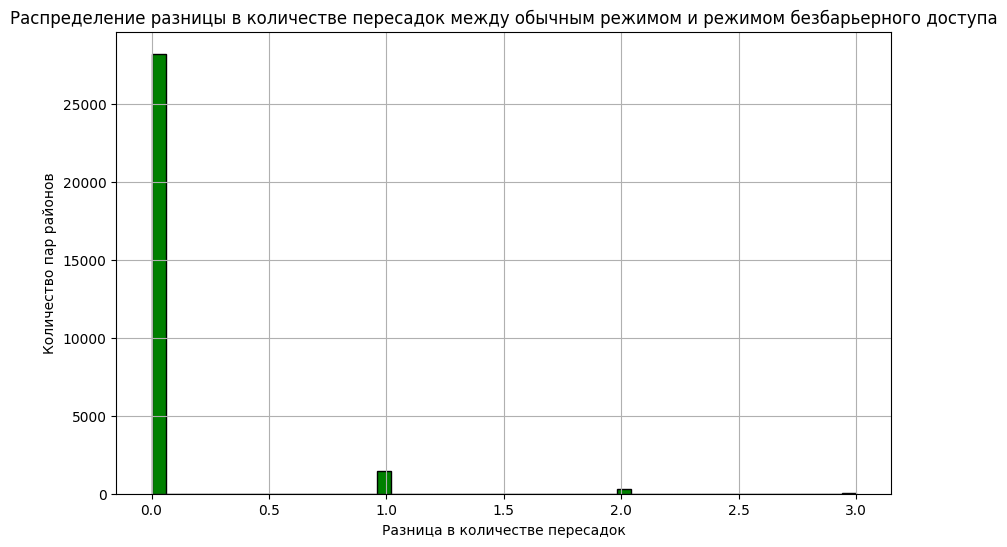

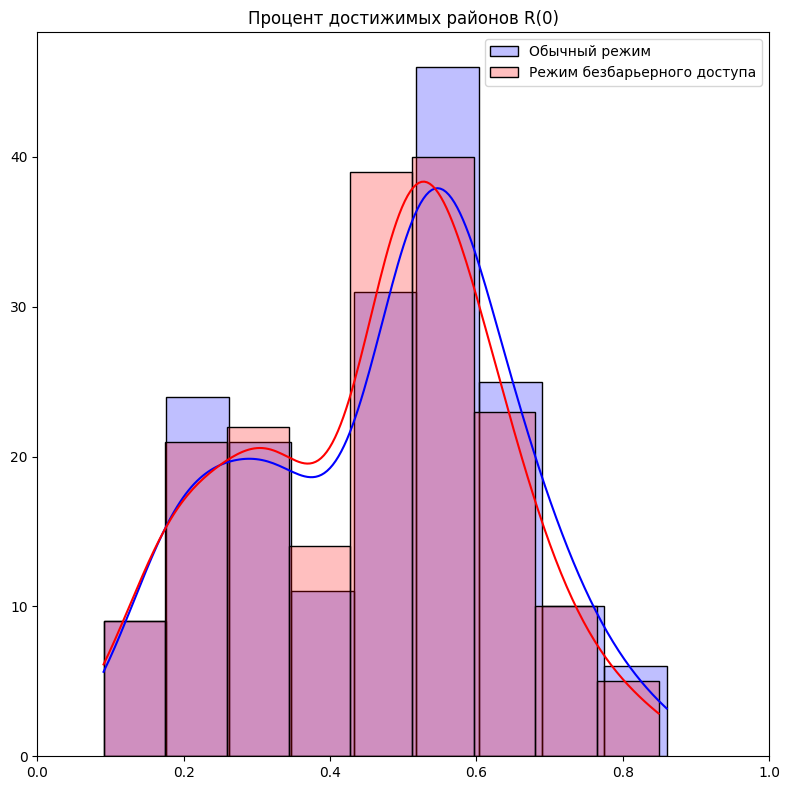

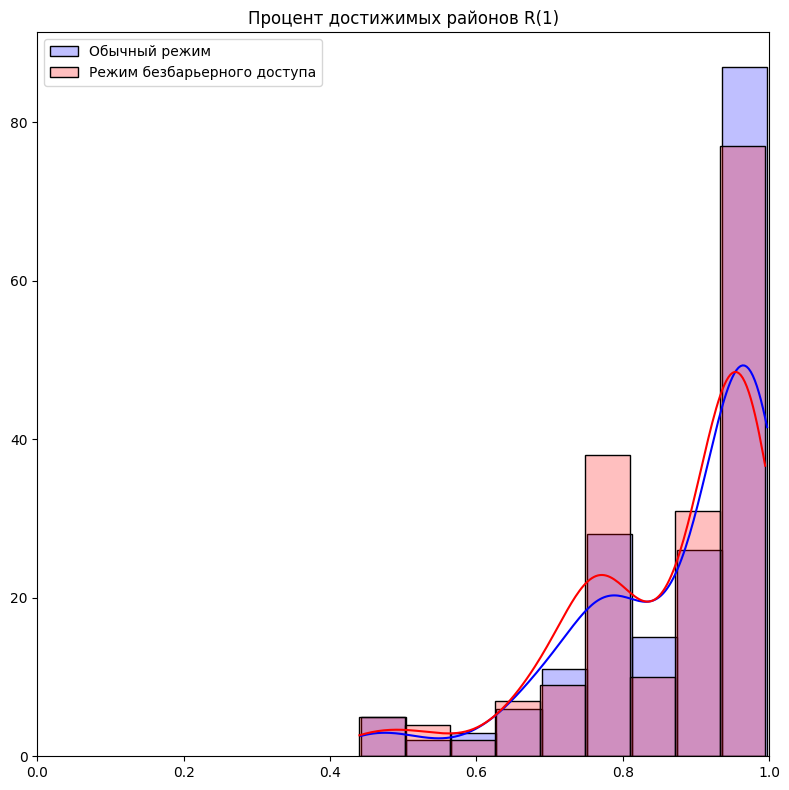

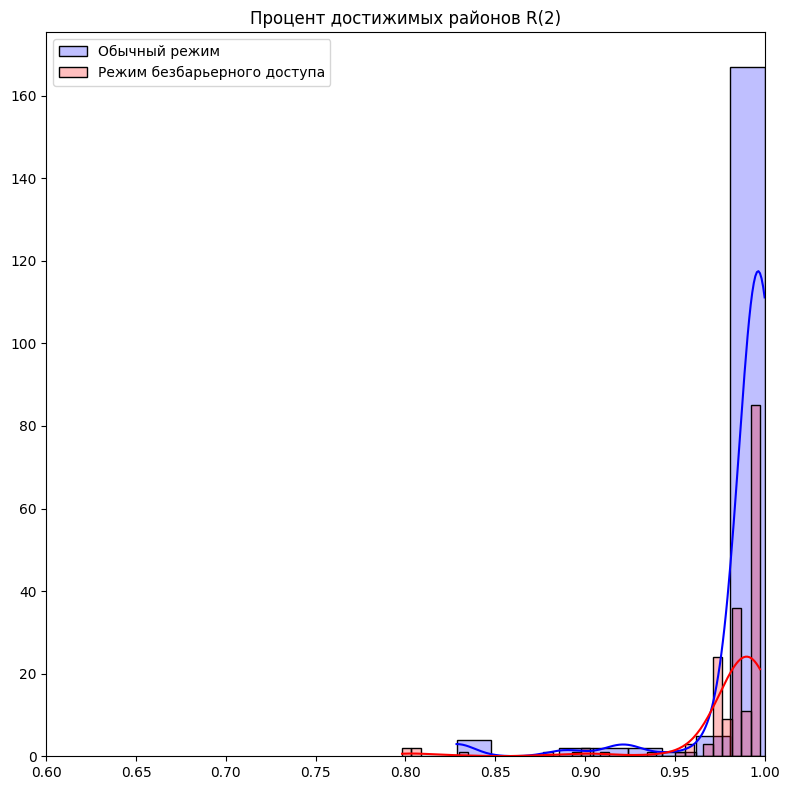

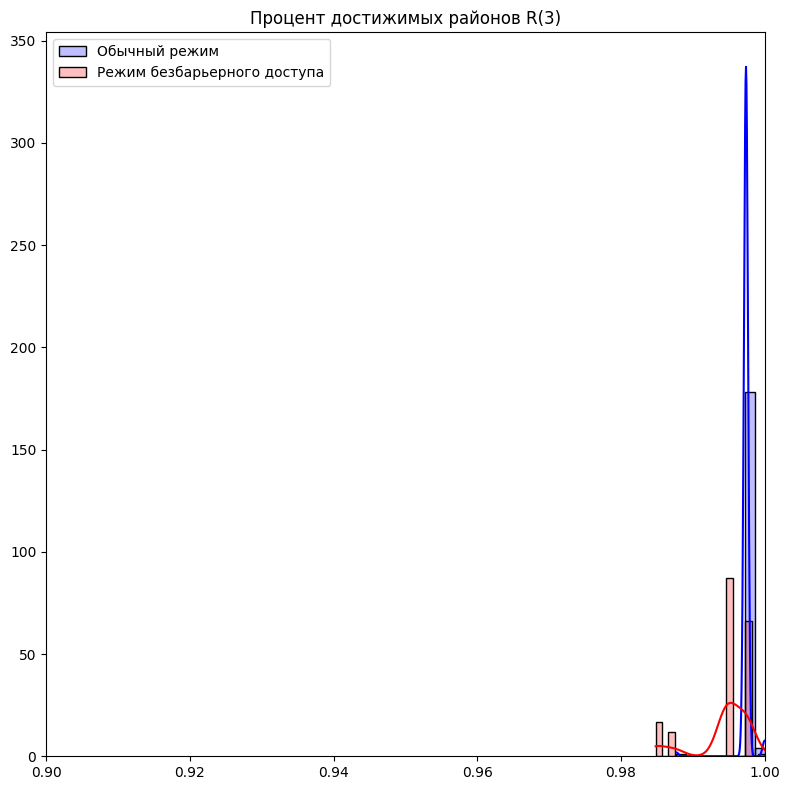

1020


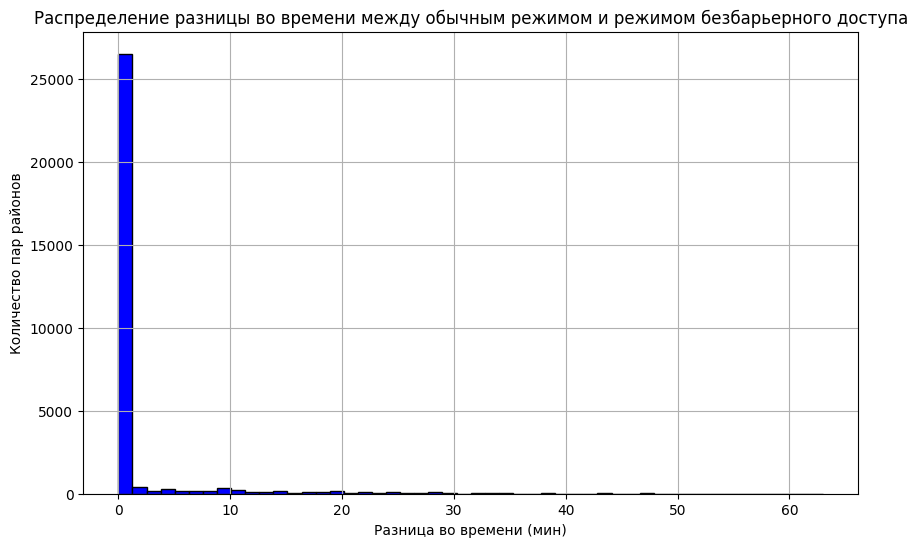

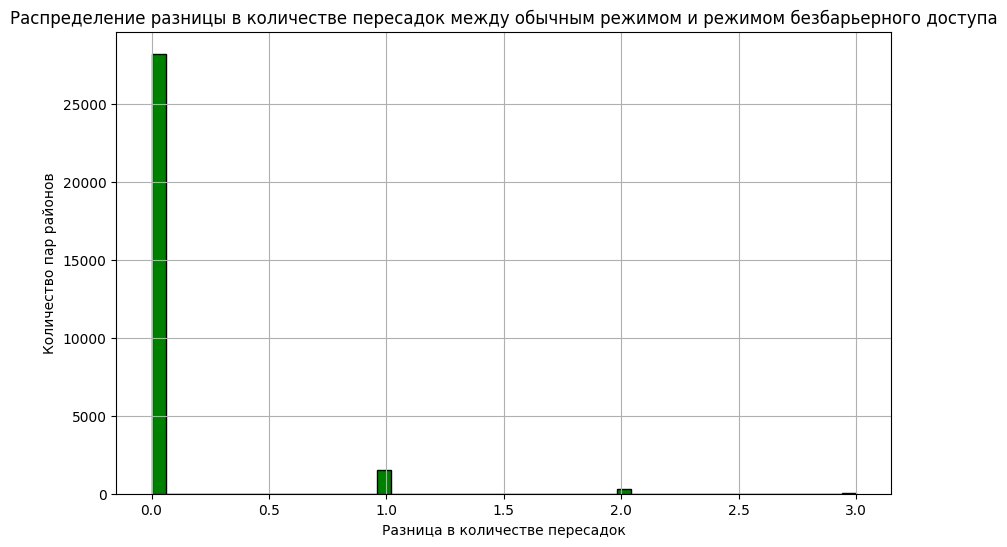

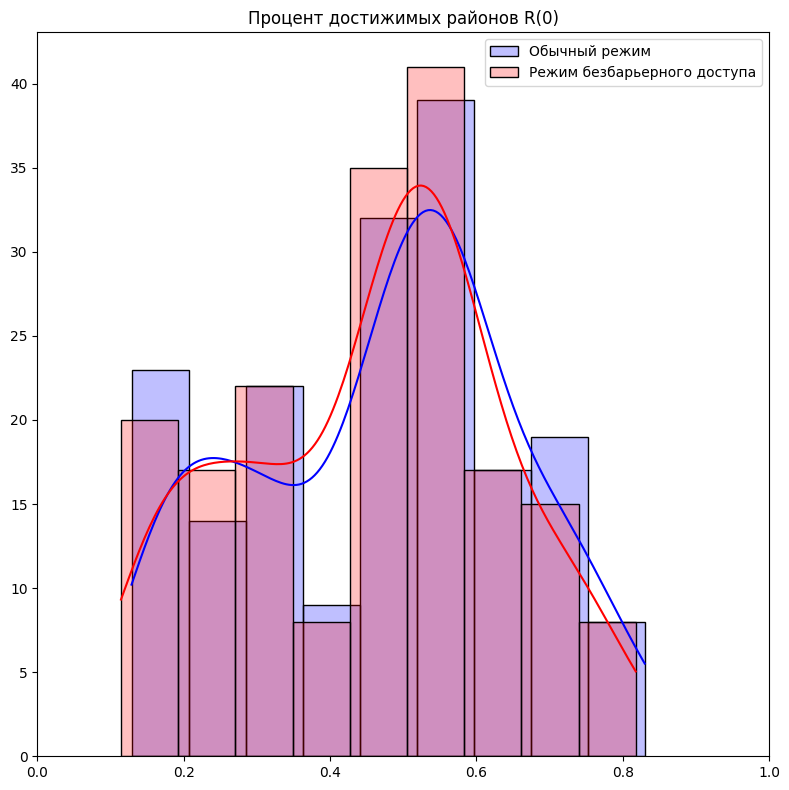

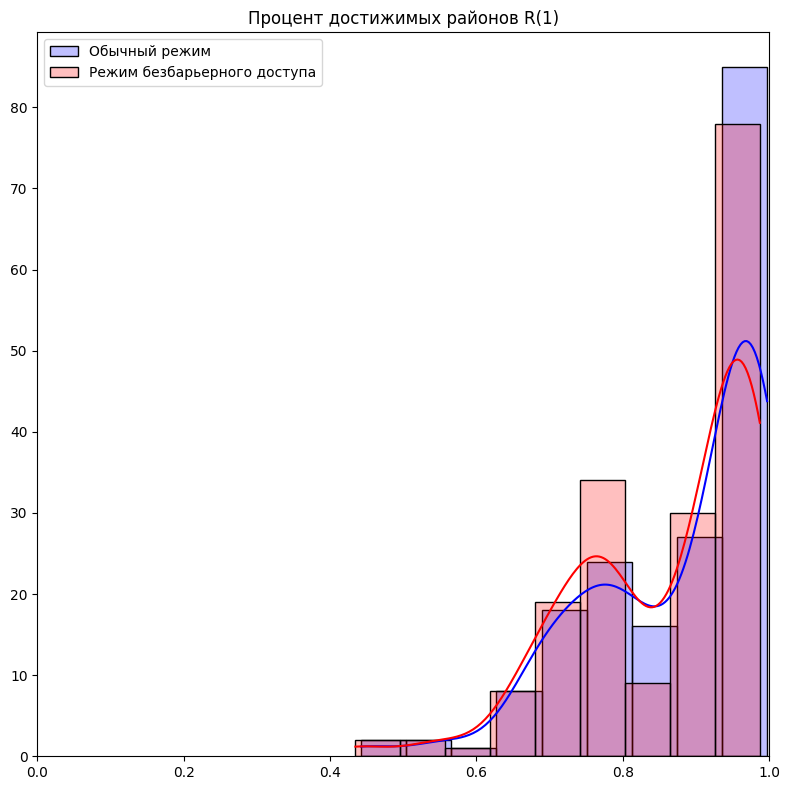

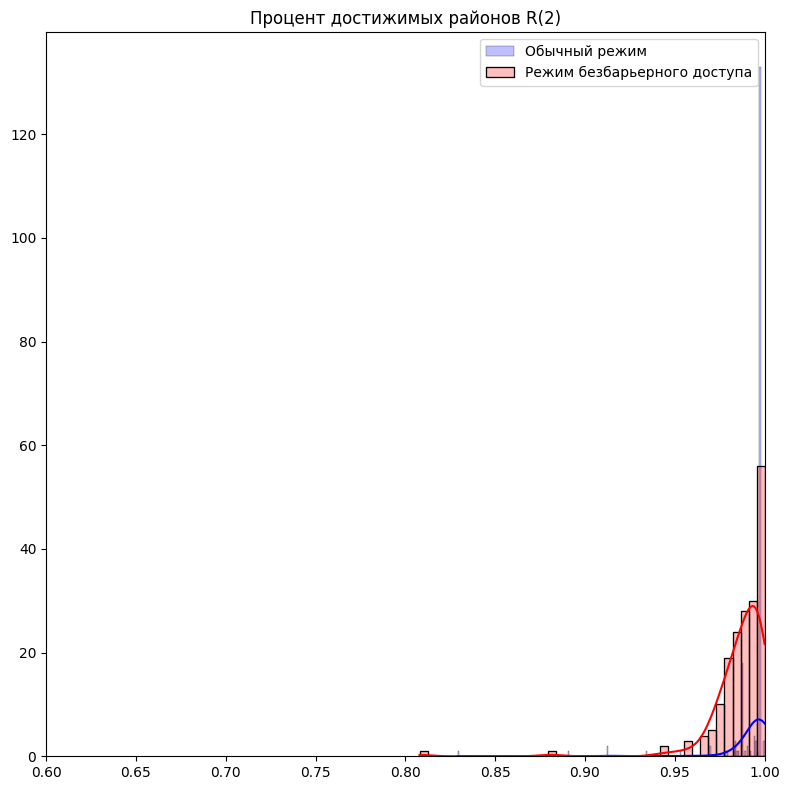

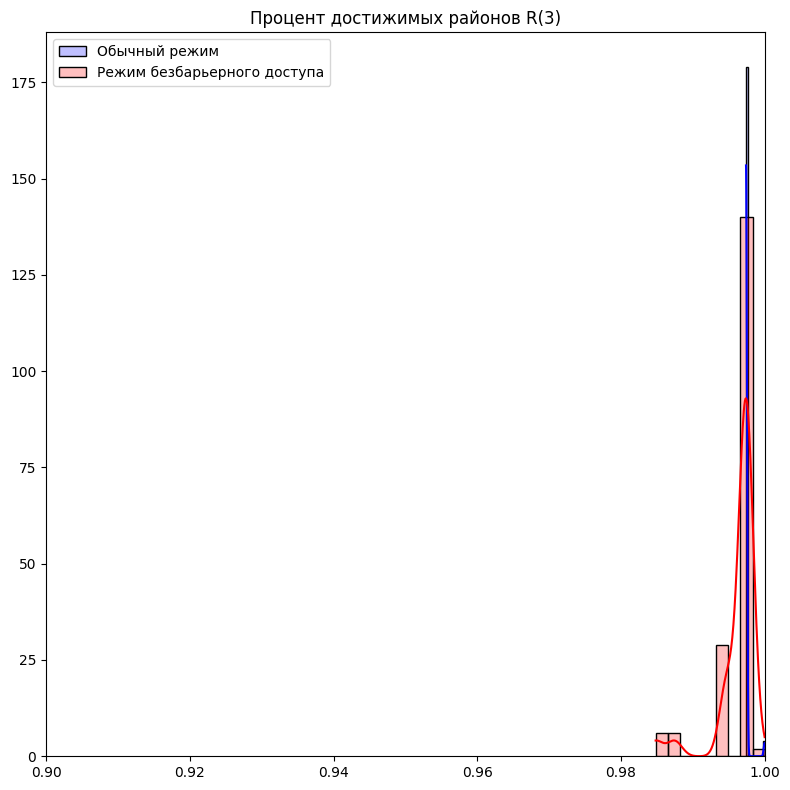

1080


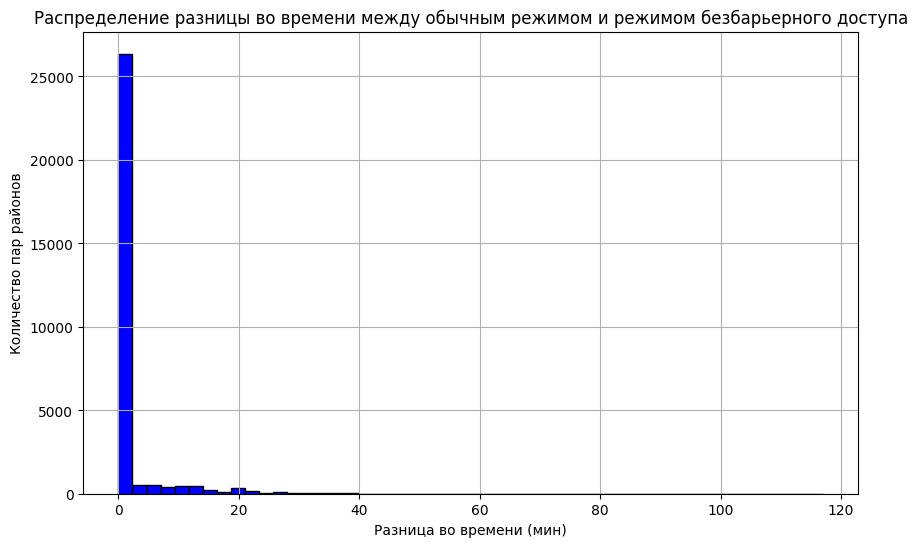

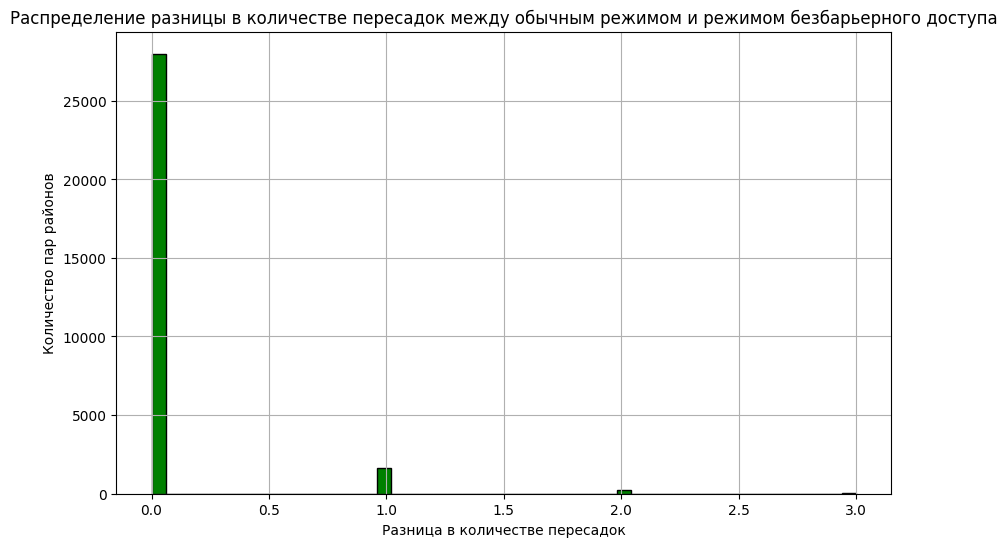

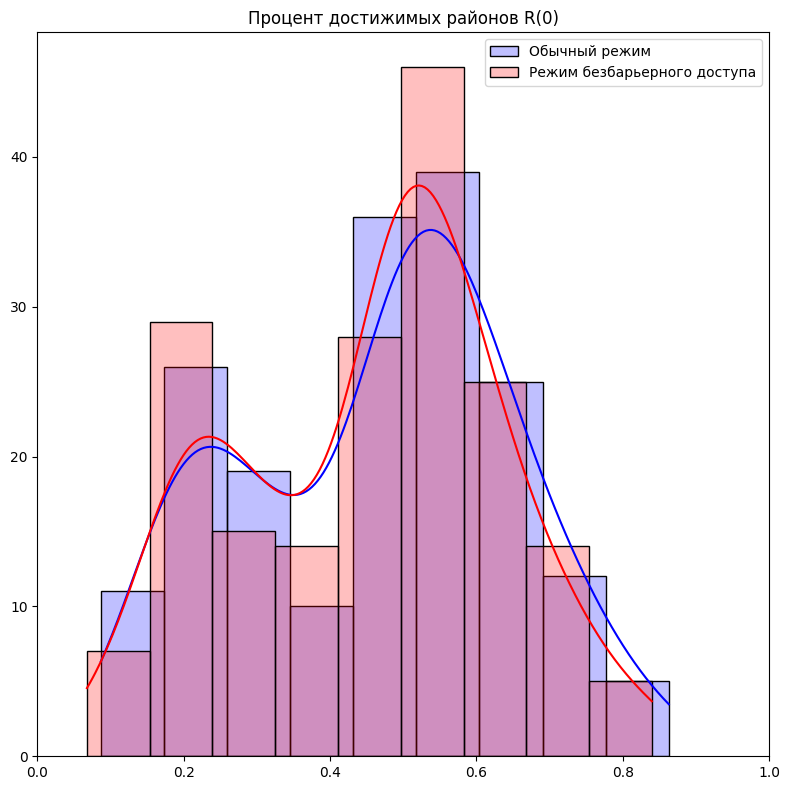

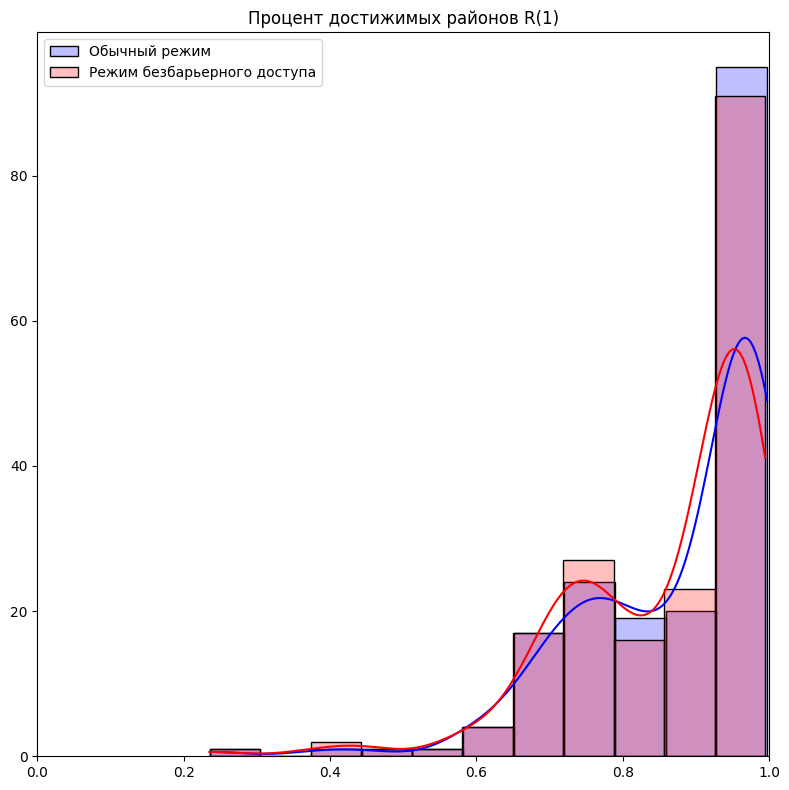

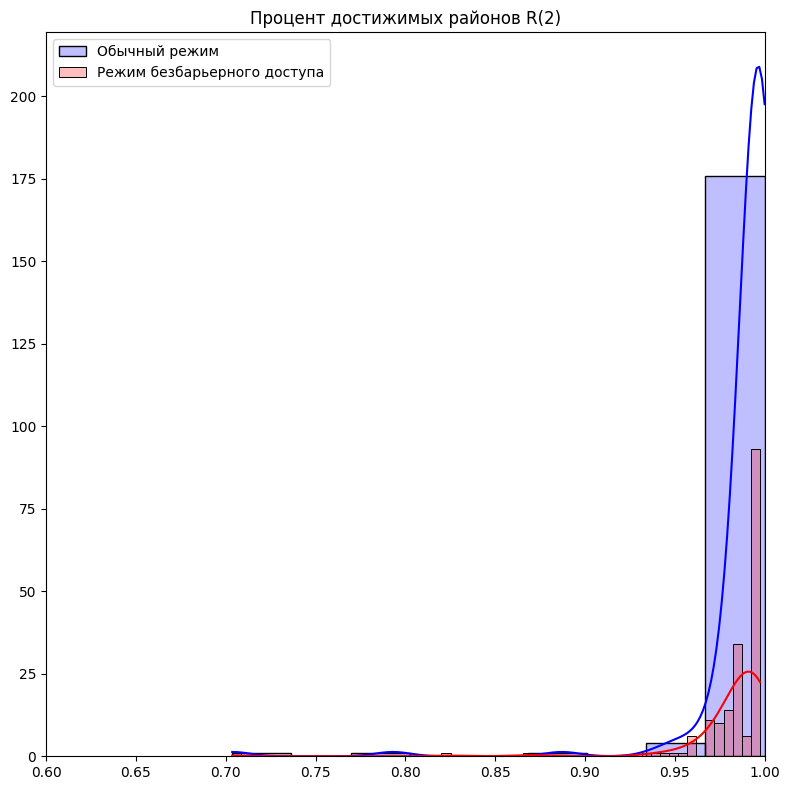

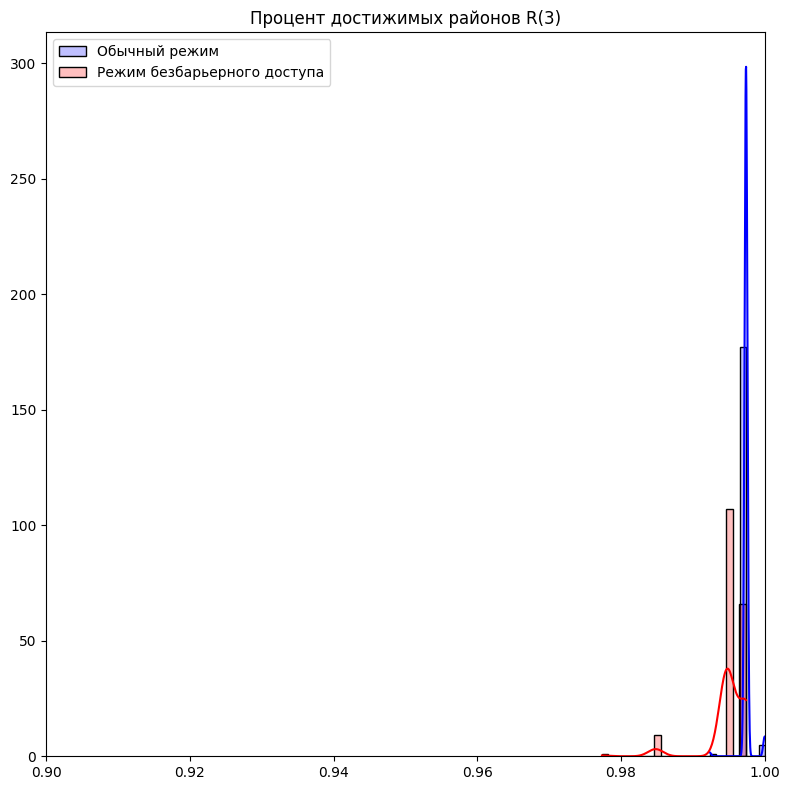

1140


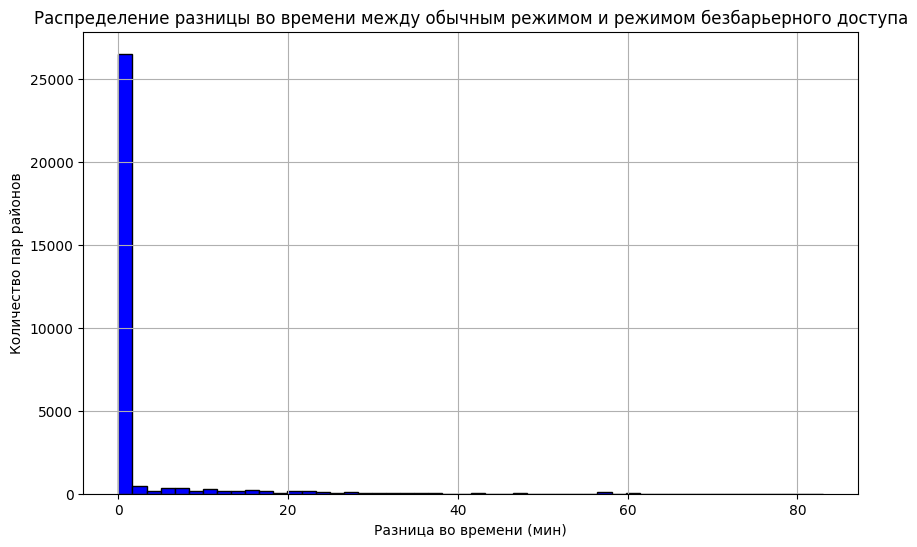

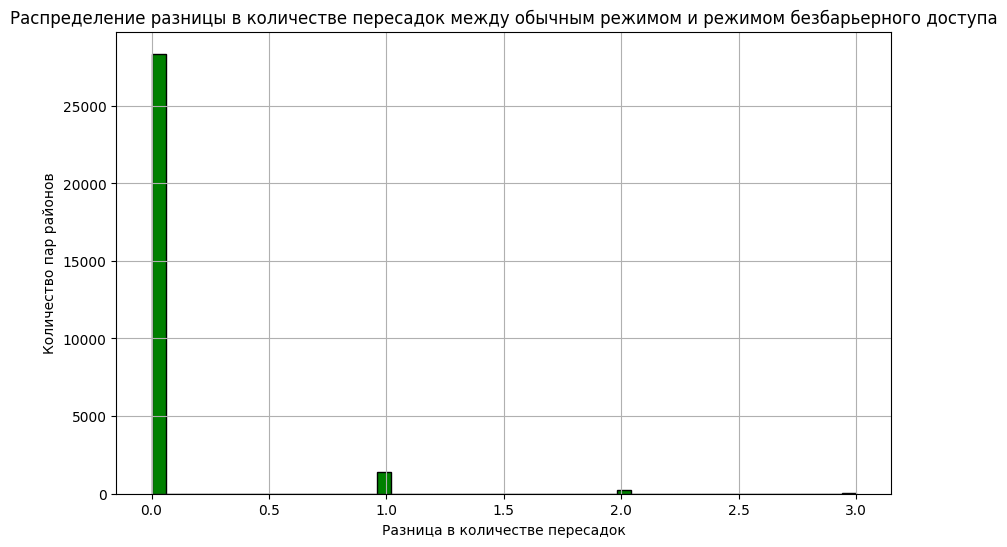

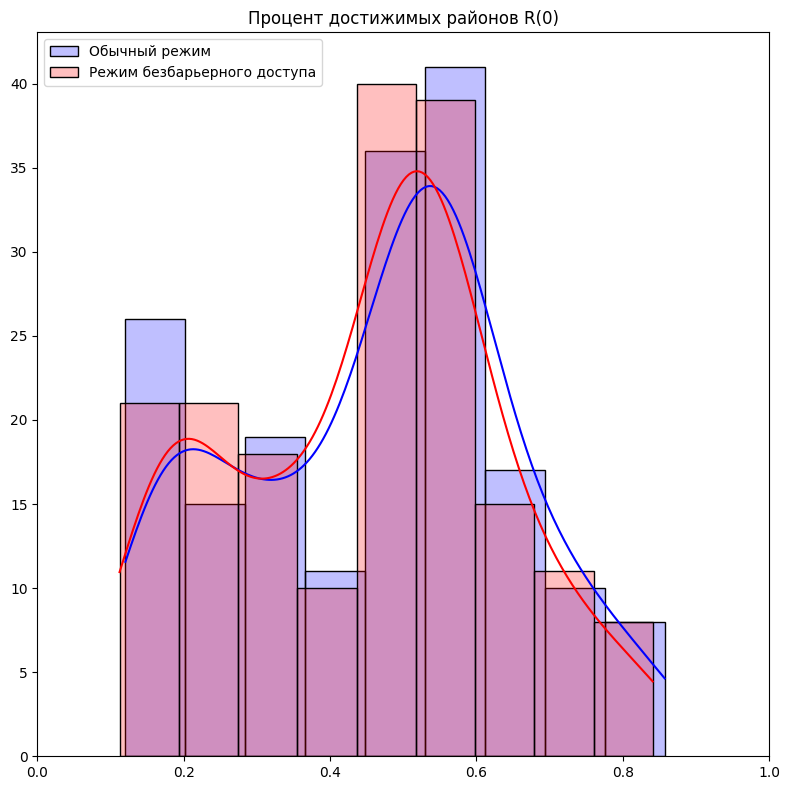

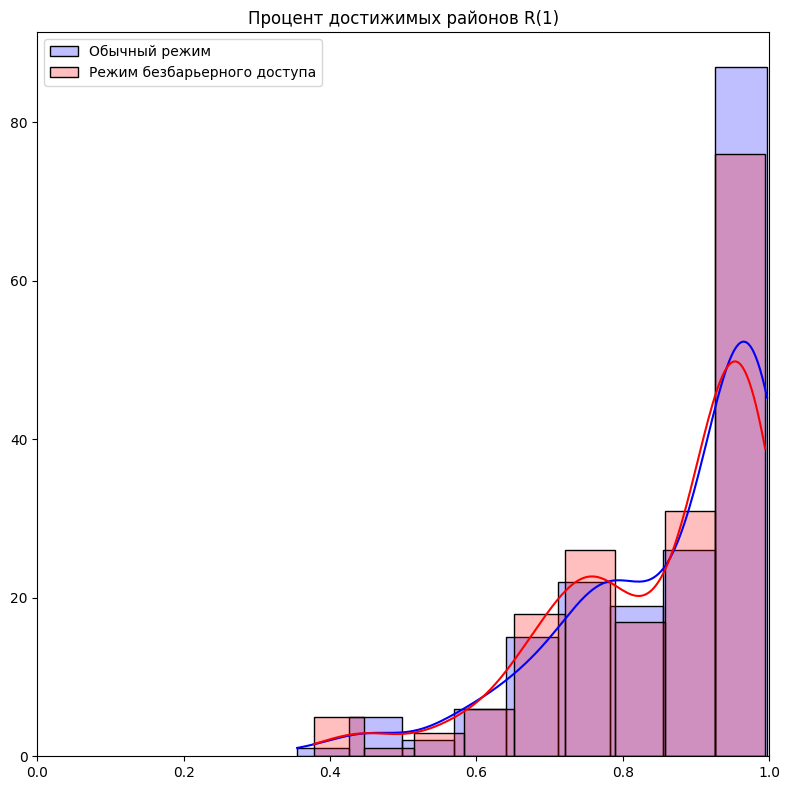

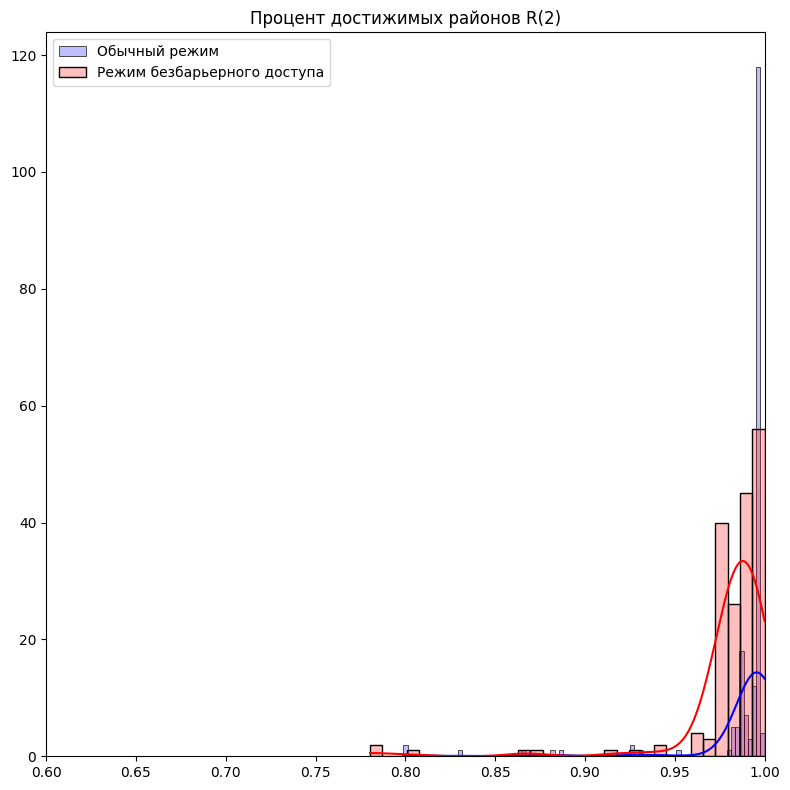

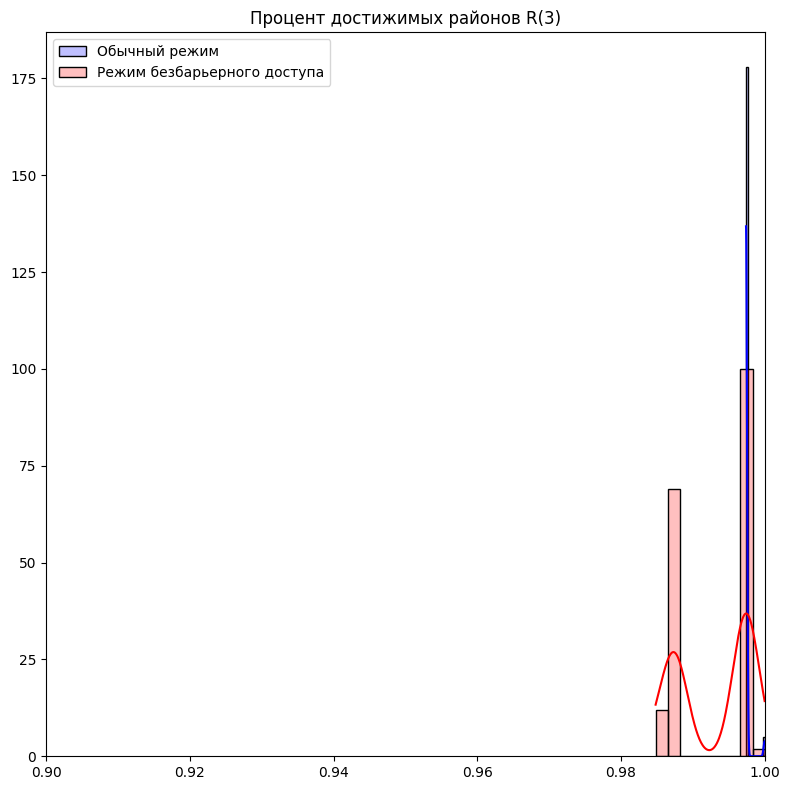

1200


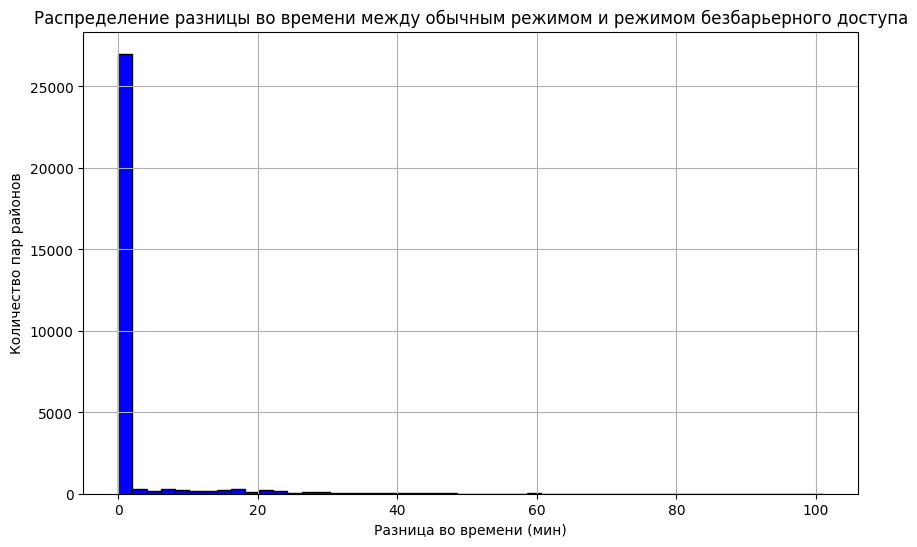

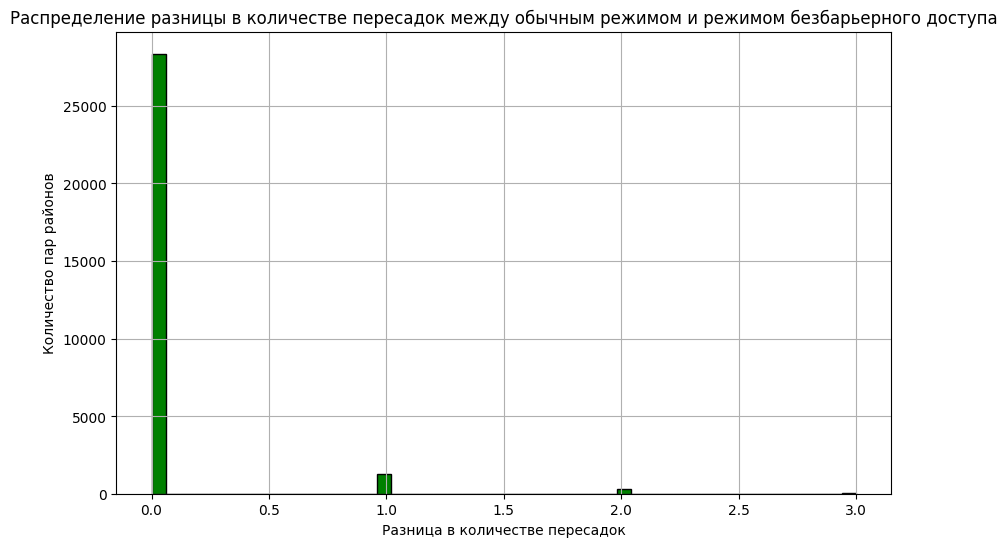

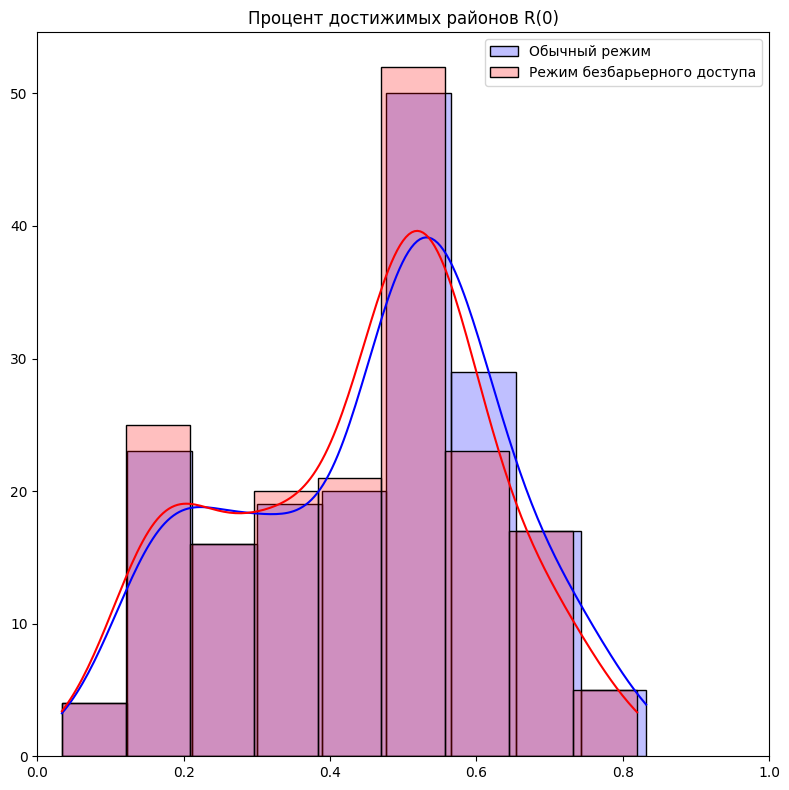

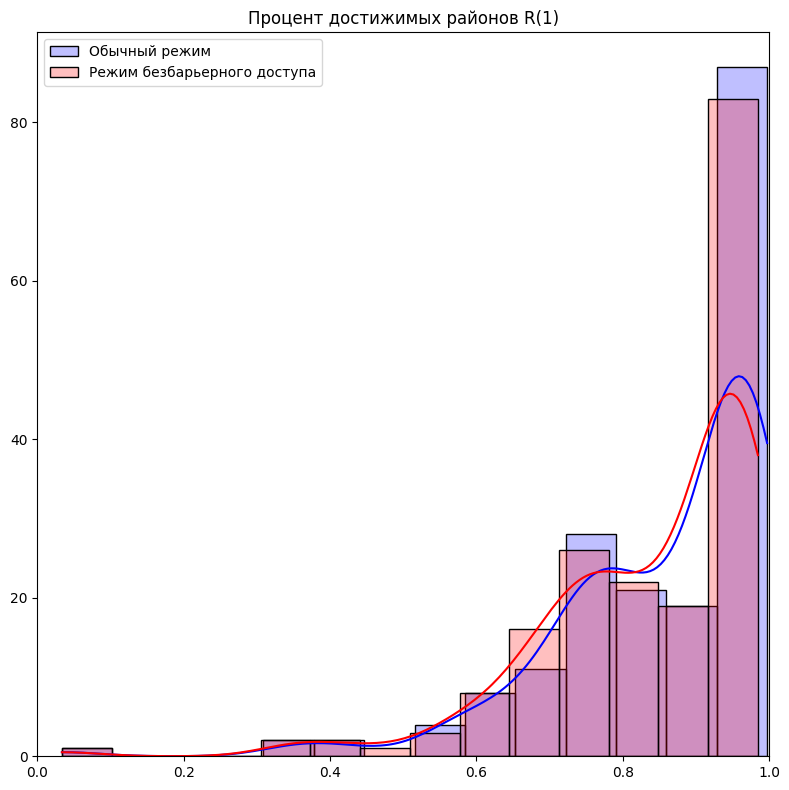

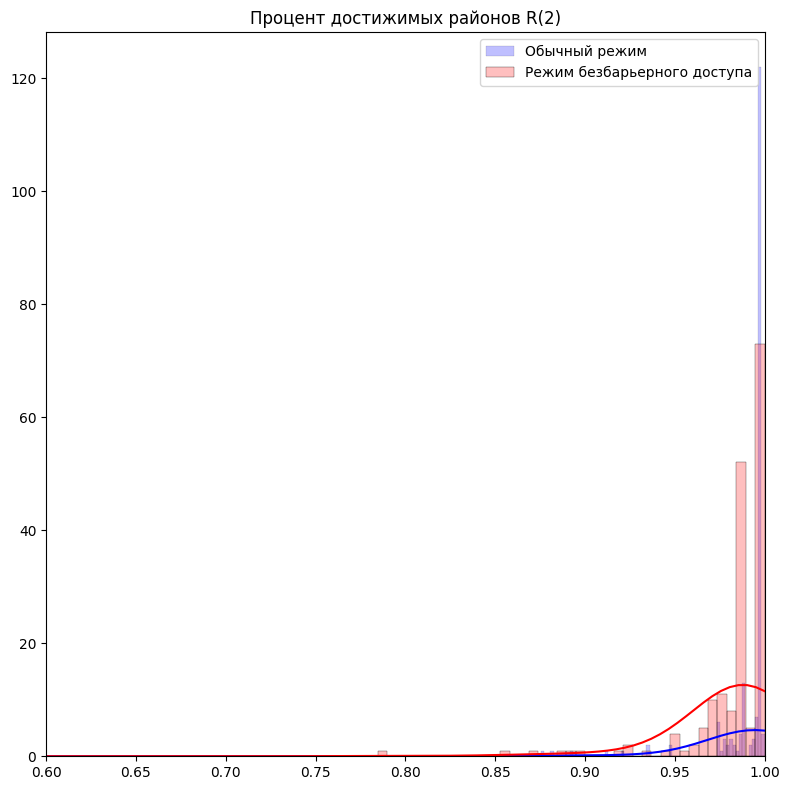

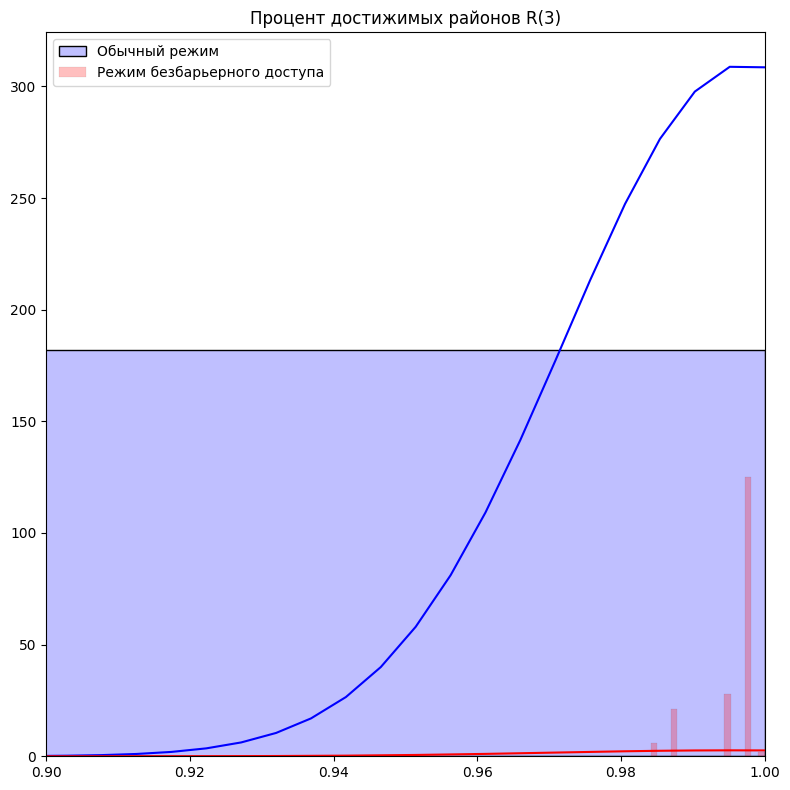

In [3]:
from AccessibilityEvaluators import DailyAccessibilityEvaluator

raptor_all=gpd.read_file(gpkg, layer='td_int3_all')
raptor_wh=gpd.read_file(gpkg, layer='td_int3_wh')
epsg=32640
#timemarks=[480, 780, 1080]
timemarks=[h for h in range(60*8, 60*21, 60)]
dae = DailyAccessibilityEvaluator(zones, raptor_all, raptor_wh, restr_type='wh', lr_sample='perm', timemarks=timemarks, epsg=epsg)
evals = dae.evals
gdf=dae.merge_daily_accessibility(evals)
#gdf.to_file(gpkg, layer='kja_daily_accessibility')

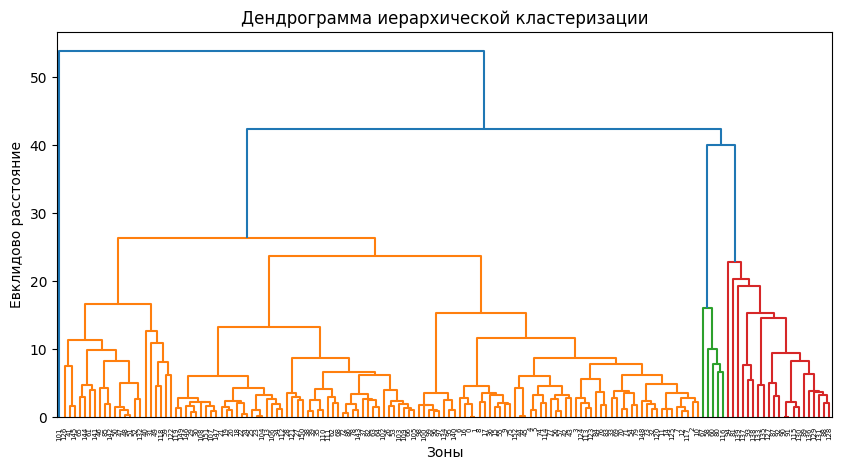

In [4]:
#dae.plot_boxplot(gdf)
gdf_v=dae.calculate_variability(gdf.copy())
gdf_cl=dae.hierarchical_clustering(gdf_v, n_clusters=3, plot_dendrogram=True)
gdf_cl.to_file(gpkg, layer='perm_daily_accessibility_variability')

c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\gamma\AppData\Local\Programs\Python\Python312

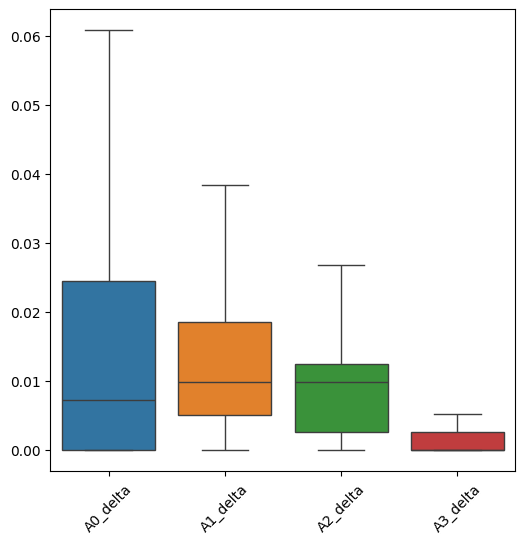

c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


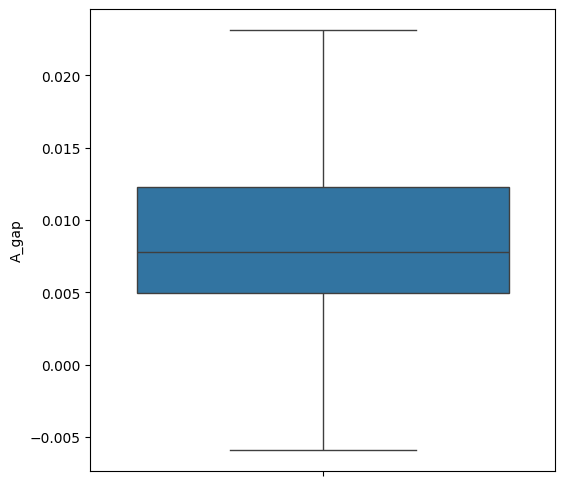

c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


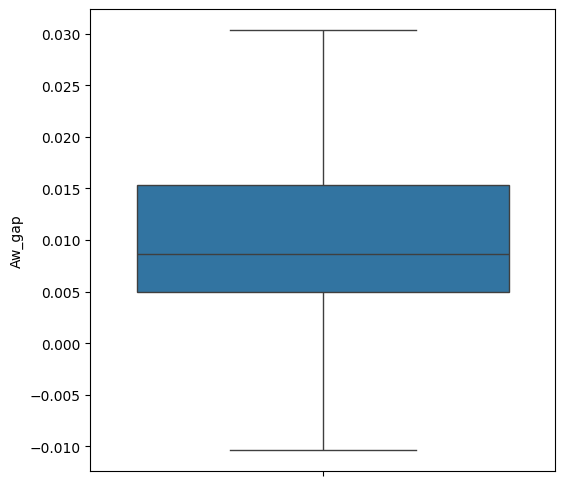

c:\Users\gamma\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


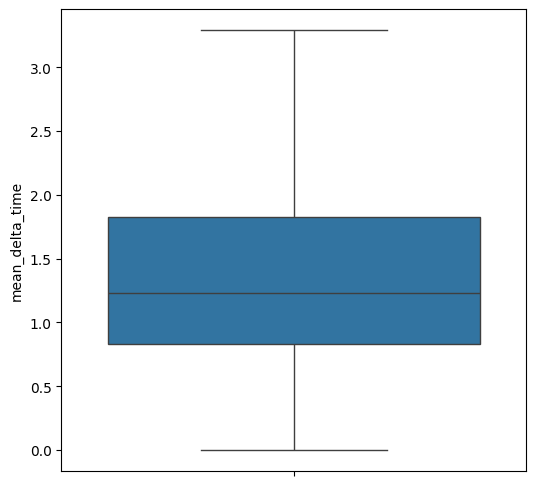

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
#gdf_v=dae.calculate_variability(gdf.copy())
def plot_boxplot(gdf):
    #metrics_base = ['A0_delta', 'A1_delta', 'A2_delta', 'A3_delta', 'A', 'A_norm', 'Aw', 'Aw_norm', 'mean_delta_time', 'mean_delta_transfers']
    #melted_df = gdf.melt(value_vars=[col for col in gdf if any(m in col for m in metrics_base)], var_name="Metric", value_name="Value")
    metrics = {
        'A0_delta': np.concatenate(gdf[[col for col in gdf.columns if 'A0_delta' in col]].values.tolist()),
        'A1_delta': np.concatenate(gdf[[col for col in gdf.columns if 'A1_delta' in col]].values.tolist()),
        'A2_delta': np.concatenate(gdf[[col for col in gdf.columns if 'A2_delta' in col]].values.tolist()),
        'A3_delta': np.concatenate(gdf[[col for col in gdf.columns if 'A3_delta' in col]].values.tolist()),
        'A_all': np.concatenate(gdf[[col for col in gdf.columns if 'A_all' in col]].values.tolist()),
        'A_wh': np.concatenate(gdf[[col for col in gdf.columns if 'A_wh' in col]].values.tolist()),
        'A_gap': np.concatenate(gdf[[col for col in gdf.columns if 'A_gap' in col and 'norm' not in col]].values.tolist()),
        'A_gap_norm': np.concatenate(gdf[[col for col in gdf.columns if 'A_gap_norm' in col]].values.tolist()),
        'Aw_all': np.concatenate(gdf[[col for col in gdf.columns if 'Aw_all' in col]].values.tolist()),
        'Aw_wh': np.concatenate(gdf[[col for col in gdf.columns if 'Aw_wh' in col]].values.tolist()),
        'Aw_gap': np.concatenate(gdf[[col for col in gdf.columns if 'Aw_gap' in col and 'norm' not in col]].values.tolist()),
        'Aw_gap_norm': np.concatenate(gdf[[col for col in gdf.columns if 'Aw_gap_norm' in col]].values.tolist()),
        'mean_delta_time': np.concatenate(gdf[[col for col in gdf.columns if 'mean_delta_time' in col]].values.tolist()),
        'mean_delta_transfers': np.concatenate(gdf[[col for col in gdf.columns if 'mean_delta_transfers' in col]].values.tolist())
    }
    #for k, v in metrics.items():
    #    print(k, len(v))
    #print(metrics)
    #print(melted_df.columns)
    df_metrics=pd.DataFrame.from_dict(metrics)
    #print(df_metrics)
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_metrics[['A0_delta', 'A1_delta', 'A2_delta', 'A3_delta']], showfliers=False)
    plt.xticks(rotation=45)
    #plt.title("Boxplot of Accessibility Metrics Over Time")
    #plt.ylabel("Values")
    plt.show()

    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_metrics['A_gap'], showfliers=False)
    plt.xticks(rotation=45)
    #plt.title("Boxplot of Accessibility Metrics Over Time")
    #plt.ylabel("Values")
    plt.show()

    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_metrics['Aw_gap'], showfliers=False)
    plt.xticks(rotation=45)
    #plt.title("Boxplot of Accessibility Metrics Over Time")
    #plt.ylabel("Values")
    plt.show()

    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_metrics['mean_delta_time'], showfliers=False)
    plt.xticks(rotation=45)
    #plt.title("Boxplot of Accessibility Metrics Over Time")
    #plt.ylabel("Values")
    plt.show()
plot_boxplot(gdf)

In [ ]:
gdf